<a href="https://colab.research.google.com/github/ZemelakGoraga/food-and-agri/blob/main/Untitled39.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ZemelakGoraga/food-and-agri

Cloning into 'food-and-agri'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 24 (delta 5), reused 20 (delta 4), pack-reused 0
Receiving objects: 100% (24/24), 5.52 KiB | 2.76 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [2]:
# Data Collection
# Loading datasets from Kaggle
from google.colab import files
files.upload() # here the downloded kaggle.json file is imported

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zemelakgoraga","key":"9bcb68625f661266080d1c6be3de4b4b"}'}

In [3]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

# Next, install the Kaggle API client.
!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 69 Sep  9 02:57 kaggle.json


In [4]:
# List the datasets
# 'kaggle datasets download -d unitednations/global-food-agriculture-statistics' this is the specific database we want to download from kaggle. N.B it may have multiple datasets. check

!kaggle datasets download -d unitednations/global-food-agriculture-statistics

 98% 433M/444M [00:05<00:00, 104MB/s] 
100% 444M/444M [00:05<00:00, 88.6MB/s]


In [6]:
# unzip the different data files
# There are above 150 tables in the following zip file

import zipfile

# Specify the path to the downloaded ZIP file
zip_file_path = "/content/global-food-agriculture-statistics.zip"

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get the list of file paths within the ZIP archive
    file_paths = zip_ref.namelist()

# Print the list of file paths
for path in file_paths:
    print(path)

current_FAO/__MACOSX/raw_files/._ASTI_Research_Spending_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._ASTI_Researchers_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._CommodityBalances_Crops_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._CommodityBalances_LivestockFish_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._ConsumerPriceIndices_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._Deflators_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_Savanna_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Crop_Residues_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Cultivated_Organic_Soils_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissi

In [7]:
# Download a specific table to work with
# Here, I will download the following table, which contains imported live animals and products:
#  Table to download: "current_FAO/raw_files/Trade_LiveAnimals_E_All_Data_(Normalized).csv", and save it as df

import pandas as pd
from zipfile import ZipFile

# Specify the CSV file to read from the ZIP archive
csv_file_to_read = "current_FAO/raw_files/Trade_LiveAnimals_E_All_Data_(Normalized).csv"

# Read the ZIP archive
with ZipFile("/content/global-food-agriculture-statistics.zip", 'r') as zip_file:
    # List the files within the ZIP archive (to double-check paths)
    print(zip_file.namelist())

    # Read the CSV file from the ZIP archive with the specified encoding and delimiter
    with zip_file.open(csv_file_to_read) as csv_file:
        df = pd.read_csv(csv_file, encoding='ISO-8859-1')

['current_FAO/__MACOSX/raw_files/._ASTI_Research_Spending_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._ASTI_Researchers_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._CommodityBalances_Crops_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._CommodityBalances_LivestockFish_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._ConsumerPriceIndices_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._Deflators_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_Savanna_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Crop_Residues_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Cultivated_Organic_Soils_E_All_Data_(Norm).csv', 'curr

In [8]:
# Viewing Data: display the first 5 rows of the df dataset

print(df.head())

   Area Code         Area  Item Code    Item  Element Code          Element  \
0          2  Afghanistan        866  Cattle          5608  Import Quantity   
1          2  Afghanistan        866  Cattle          5608  Import Quantity   
2          2  Afghanistan        866  Cattle          5608  Import Quantity   
3          2  Afghanistan        866  Cattle          5608  Import Quantity   
4          2  Afghanistan        866  Cattle          5608  Import Quantity   

   Year Code  Year  Unit  Value Flag  
0       1961  1961  Head    NaN    M  
1       1962  1962  Head    NaN    M  
2       1963  1963  Head    NaN    M  
3       1964  1964  Head    NaN    M  
4       1965  1965  Head    NaN    M  


In [9]:
# Display the last 5 rows of the df dataset

print(df.tail())

        Area Code                                     Area  Item Code  \
662953       5817  Net Food Importing Developing Countries       1922   
662954       5817  Net Food Importing Developing Countries       1922   
662955       5817  Net Food Importing Developing Countries       1922   
662956       5817  Net Food Importing Developing Countries       1922   
662957       5817  Net Food Importing Developing Countries       1922   

                   Item  Element Code       Element  Year Code  Year  \
662953  Sheep and Goats          5922  Export Value       2009  2009   
662954  Sheep and Goats          5922  Export Value       2010  2010   
662955  Sheep and Goats          5922  Export Value       2011  2011   
662956  Sheep and Goats          5922  Export Value       2012  2012   
662957  Sheep and Goats          5922  Export Value       2013  2013   

            Unit      Value Flag  
662953  1000 US$   456293.0    A  
662954  1000 US$   421311.0    A  
662955  1000 US$   6493

In [10]:
#Understanding the Structure
# Get the number of rows and columns : the data set has 662958 rows and 11 columns
num_rows, num_cols = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_cols}")


Number of rows: 662958
Number of columns: 11


In [11]:
# Display column names
print("\nColumn names:")
print(df.columns)


Column names:
Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Year Code', 'Year', 'Unit', 'Value', 'Flag'],
      dtype='object')


In [12]:
# Display unique values count for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nPotential Data Quality Issues (Categorical Columns):")
for column in categorical_columns:
    unique_values_count = df[column].nunique()
    print(f"{column}: {unique_values_count} unique values")


Potential Data Quality Issues (Categorical Columns):
Area: 252 unique values
Item: 25 unique values
Element: 4 unique values
Unit: 4 unique values
Flag: 5 unique values


In [13]:
# Viewing unique values within each column

unique_areas = df['Area'].unique()

unique_items = df['Item'].unique()

unique_elements = df['Element'].unique()

unique_flags = df['Flag'].unique()

unique_years = df['Year'].unique()
unique_units = df['Unit'].unique()

print("Unique Areas:", unique_areas)

print("Unique Items:", unique_items)

print("Unique Elements:", unique_elements)

print("Unique Flags:", unique_flags)

print("Year:", unique_years)
print("Unit:", unique_units)

Unique Areas: ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Czechoslovakia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Ethio

In [28]:
# Select only required columns for analysis and save the data as cattle_filtered_df

selected_columns = ['Area', 'Item', 'Element', 'Unit', 'Value', 'Year']
filtered_df = df[selected_columns]
print("Selected Data:")
print(filtered_df.head())

Selected Data:
          Area    Item          Element  Unit  Value  Year
0  Afghanistan  Cattle  Import Quantity  Head    NaN  1961
1  Afghanistan  Cattle  Import Quantity  Head    NaN  1962
2  Afghanistan  Cattle  Import Quantity  Head    NaN  1963
3  Afghanistan  Cattle  Import Quantity  Head    NaN  1964
4  Afghanistan  Cattle  Import Quantity  Head    NaN  1965


In [29]:
# Next, let us rename the 'Area' column by 'Country' and remove the 'Item' column as cattle is the only unique value in it

# Rename the 'Area' column to 'Country'
filtered_df.rename(columns={'Area': 'Country'}, inplace=True)

# Remove the 'Item' column
#filtered_df = filtered_df.drop(columns=['Item'])

# Print the updated DataFrame
print(filtered_df.head())

       Country    Item          Element  Unit  Value  Year
0  Afghanistan  Cattle  Import Quantity  Head    NaN  1961
1  Afghanistan  Cattle  Import Quantity  Head    NaN  1962
2  Afghanistan  Cattle  Import Quantity  Head    NaN  1963
3  Afghanistan  Cattle  Import Quantity  Head    NaN  1964
4  Afghanistan  Cattle  Import Quantity  Head    NaN  1965


<ipython-input-29-a42965da38f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'Area': 'Country'}, inplace=True)


In [30]:
# Select the subset where 'Unit' is '1000 US$'
# As we can see below, there are a total of 21453 rows of the dataset where the 'Unit' column is '1000 US$'

subset_filtered_df = filtered_df[filtered_df['Unit'] == '1000 US$']

# Print the selected subset DataFrame
print(subset_filtered_df)

                                        Country             Item  \
53                                  Afghanistan           Cattle   
54                                  Afghanistan           Cattle   
55                                  Afghanistan           Cattle   
56                                  Afghanistan           Cattle   
57                                  Afghanistan           Cattle   
...                                         ...              ...   
662953  Net Food Importing Developing Countries  Sheep and Goats   
662954  Net Food Importing Developing Countries  Sheep and Goats   
662955  Net Food Importing Developing Countries  Sheep and Goats   
662956  Net Food Importing Developing Countries  Sheep and Goats   
662957  Net Food Importing Developing Countries  Sheep and Goats   

             Element      Unit      Value  Year  
53      Import Value  1000 US$        NaN  1961  
54      Import Value  1000 US$        NaN  1962  
55      Import Value  1000 US$   

In [31]:
# Select the subset where 'Unit' is '1000 US$'
# As we can see below, there are a total of 21453 rows of the dataset where the 'Unit' column is '1000 US$'

subset_filtered_df = filtered_df[filtered_df['Unit'] == 'No']

# Print the selected subset DataFrame
print(subset_filtered_df)

                                        Country      Item          Element  \
1484                                    Albania  Beehives  Import Quantity   
1485                                    Albania  Beehives  Import Quantity   
1486                                    Albania  Beehives  Import Quantity   
1487                                    Albania  Beehives  Import Quantity   
1488                                    Albania  Beehives  Import Quantity   
...                                         ...       ...              ...   
659402  Net Food Importing Developing Countries  Beehives  Export Quantity   
659403  Net Food Importing Developing Countries  Beehives  Export Quantity   
659404  Net Food Importing Developing Countries  Beehives  Export Quantity   
659405  Net Food Importing Developing Countries  Beehives  Export Quantity   
659406  Net Food Importing Developing Countries  Beehives  Export Quantity   

       Unit  Value  Year  
1484     No    NaN  1961  
1485     

In [32]:
# Select the subset where 'Unit' is '1000 Head'
# As we can see below, there is no row of the dataset where the 'Unit' column is '1000 Head', so there is no need to multiply the quantity by 1000 head
subset_filtered_df = filtered_df[filtered_df['Unit'] == '1000 Head']

# Print the selected subset DataFrame
print(subset_filtered_df)

                                        Country      Item          Element  \
106                                 Afghanistan  Chickens  Import Quantity   
107                                 Afghanistan  Chickens  Import Quantity   
108                                 Afghanistan  Chickens  Import Quantity   
109                                 Afghanistan  Chickens  Import Quantity   
110                                 Afghanistan  Chickens  Import Quantity   
...                                         ...       ...              ...   
662052  Net Food Importing Developing Countries   Turkeys  Export Quantity   
662053  Net Food Importing Developing Countries   Turkeys  Export Quantity   
662054  Net Food Importing Developing Countries   Turkeys  Export Quantity   
662055  Net Food Importing Developing Countries   Turkeys  Export Quantity   
662056  Net Food Importing Developing Countries   Turkeys  Export Quantity   

             Unit   Value  Year  
106     1000 Head     0.0  19

In [33]:
# Let us remove the 'Unit' column from the cattle_filtered_df dataset

# Remove the 'Unit' column
filtered_df = filtered_df.drop(columns=['Unit'])

# Print the updated DataFrame
print(filtered_df)

                                        Country             Item  \
0                                   Afghanistan           Cattle   
1                                   Afghanistan           Cattle   
2                                   Afghanistan           Cattle   
3                                   Afghanistan           Cattle   
4                                   Afghanistan           Cattle   
...                                         ...              ...   
662953  Net Food Importing Developing Countries  Sheep and Goats   
662954  Net Food Importing Developing Countries  Sheep and Goats   
662955  Net Food Importing Developing Countries  Sheep and Goats   
662956  Net Food Importing Developing Countries  Sheep and Goats   
662957  Net Food Importing Developing Countries  Sheep and Goats   

                Element      Value  Year  
0       Import Quantity        NaN  1961  
1       Import Quantity        NaN  1962  
2       Import Quantity        NaN  1963  
3       Imp

In [34]:
# Let us keep the 'filtered_df'dataset as it is and make its copy as df1 for further data processing

df1 = filtered_df.copy()
df1.head()

Country    Item          Element  Value  Year
0  Afghanistan  Cattle  Import Quantity    NaN  1961
1  Afghanistan  Cattle  Import Quantity    NaN  1962
2  Afghanistan  Cattle  Import Quantity    NaN  1963
3  Afghanistan  Cattle  Import Quantity    NaN  1964
4  Afghanistan  Cattle  Import Quantity    NaN  1965

In [35]:
df1.tail()

Country             Item  \
662953  Net Food Importing Developing Countries  Sheep and Goats   
662954  Net Food Importing Developing Countries  Sheep and Goats   
662955  Net Food Importing Developing Countries  Sheep and Goats   
662956  Net Food Importing Developing Countries  Sheep and Goats   
662957  Net Food Importing Developing Countries  Sheep and Goats   

             Element      Value  Year  
662953  Export Value   456293.0  2009  
662954  Export Value   421311.0  2010  
662955  Export Value   649321.0  2011  
662956  Export Value   778317.0  2012  
662957  Export Value  1038636.0  2013

In [37]:
df1.shape


(662958, 5)

In [72]:
# Select the subset where 'Value' is '0.0'
# As we can see below, there is no row of the dataset where the 'Value' column is '0.0', so there is no need to multiply the quantity by 1000 head
updated_df2 = df2[df2['Value'] == 0.0]

# Print the selected subset DataFrame
print(updated_df2)

                                        Country      Item          Element  \
106                                 Afghanistan  Chickens  Import Quantity   
107                                 Afghanistan  Chickens  Import Quantity   
108                                 Afghanistan  Chickens  Import Quantity   
109                                 Afghanistan  Chickens  Import Quantity   
110                                 Afghanistan  Chickens  Import Quantity   
...                                         ...       ...              ...   
662082  Net Food Importing Developing Countries   Turkeys     Export Value   
662083  Net Food Importing Developing Countries   Turkeys     Export Value   
662084  Net Food Importing Developing Countries   Turkeys     Export Value   
662085  Net Food Importing Developing Countries   Turkeys     Export Value   
662088  Net Food Importing Developing Countries   Turkeys     Export Value   

        Value  Year  
106       0.0  1961  
107       0.0  1962

In [73]:
# Remove rows where 'Value' is equal to 0.0
df3 = df1[df1['Value'] != 0.0] # df3 is df1 minus data where Value = 0.0

# Print the updated DataFrame
print(df3)


                                        Country             Item  \
0                                   Afghanistan           Cattle   
1                                   Afghanistan           Cattle   
2                                   Afghanistan           Cattle   
3                                   Afghanistan           Cattle   
4                                   Afghanistan           Cattle   
...                                         ...              ...   
662953  Net Food Importing Developing Countries  Sheep and Goats   
662954  Net Food Importing Developing Countries  Sheep and Goats   
662955  Net Food Importing Developing Countries  Sheep and Goats   
662956  Net Food Importing Developing Countries  Sheep and Goats   
662957  Net Food Importing Developing Countries  Sheep and Goats   

                Element      Value  Year  
0       Import Quantity        NaN  1961  
1       Import Quantity        NaN  1962  
2       Import Quantity        NaN  1963  
3       Imp

In [92]:
# save copy of df1 as df2
df2 = df3.copy()

In [93]:
df2.shape

(495902, 5)

In [94]:
# Check for missing values in each column
missing_values = df2.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Country         0
Item            0
Element         0
Value      135190
Year            0
dtype: int64


In [98]:
# Let us sort missing values by unique values in the 'Elelemnt' column: Import Quantity, Import Value, Export Quantity and Export Value of cattle

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df2['Element'].unique())

# Create an empty DataFrame to store missing value counts
missing_values_df2 = pd.DataFrame(columns=unique_elements)

# Iterate through unique elements and calculate missing value counts
for element in unique_elements:
    subset = df2[df2['Element'] == element]
    missing_counts = subset.isnull().sum()
    missing_values_df2[element] = missing_counts

# Print the DataFrame with missing value counts
print(missing_values_df2)

         Export Quantity  Export Value  Import Quantity  Import Value
Country                0             0                0             0
Item                   0             0                0             0
Element                0             0                0             0
Value              30142         30533            37045         37470
Year                   0             0                0             0


In [100]:
import pandas as pd

# Assuming df2 is your DataFrame

# Get the unique values in the 'Item' column and sort them
unique_items = sorted(df2['Item'].unique())

# Create an empty DataFrame to store missing value counts
missing_values_df2 = pd.DataFrame(columns=unique_items)

# Iterate through unique items and calculate missing value counts
for item in unique_items:
    subset = df2[df2['Item'] == item]
    missing_counts = subset.isnull().sum()
    missing_values_df2[item] = missing_counts

# Print the DataFrame with missing value counts
print(missing_values_df2)


         Agricult.Products,Total  Animals live nes  Animals, live, non-food  \
Country                        0                 0                        0   
Item                           0                 0                        0   
Element                        0                 0                        0   
Value                          4              9393                     4952   
Year                           0                 0                        0   

         Asses  Beehives  Bovine, Animals  Buffaloes  Camelids, other  Camels  \
Country      0         0                0          0                0       0   
Item         0         0                0          0                0       0   
Element      0         0                0          0                0       0   
Value     5460     11667             2717       6978             3899    5545   
Year         0         0                0          0                0       0   

         Cattle  ...  Live Animals  Mu

In [101]:
# Replace missing values by Median
# Sort the DataFrame by the 'Element' column
df2 = df2.sort_values(by='Item')

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df2['Item'].unique())

# Create an empty DataFrame to store missing value counts
missing_values_df2 = pd.DataFrame(columns=unique_elements)

# Create a dictionary to store median values for each element
median_values = {}

# Iterate through unique elements and calculate missing value counts
for element in unique_elements:
    subset = df2[df2['Item'] == element]
    missing_counts = subset.isnull().sum()
    missing_values_df2[element] = missing_counts

    # Calculate median value for each subset
    median_value = subset['Value'].median()
    median_values[element] = median_value

    print(f"median value for {element} subset: {median_value:.2f}")

# Print the DataFrame with missing value counts
print("\nMissing value counts:")
print(missing_values_df2)

# Replace missing values by median values for each unique element
for element in unique_elements:
    subset = df2[df2['Item'] == element]
    median_value = median_values[element]
    df2.loc[subset.index, 'Value'] = subset['Value'].fillna(median_value)

# Print DataFrame with missing values replaced by median values
print("\nDataFrame with missing values replaced by median values:")
print(df2)

median value for Agricult.Products,Total subset: 291979.00
median value for Animals live nes subset: 109.00
median value for Animals, live, non-food subset: 954.00
median value for Asses subset: 84.00
median value for Beehives subset: 130.00
median value for Bovine, Animals subset: 6457.00
median value for Buffaloes subset: 2700.00
median value for Camelids, other subset: 39.50
median value for Camels subset: 5738.50
median value for Cattle subset: 6369.50
median value for Chickens subset: 894.00
median value for Ducks subset: 110.00
median value for Food Excl Fish subset: 191623.00
median value for Goats subset: 856.00
median value for Horses subset: 371.00
median value for Live Animals subset: 5346.00
median value for Mules subset: 37.00
median value for Pigeons, other birds subset: 77.00
median value for Pigs subset: 1038.00
median value for Rabbits and hares subset: 100.00
median value for Rodents, other subset: 77.00
median value for Sheep subset: 5000.00
median value for Sheep an

In [102]:
missingv = df2.isnull().sum()
missingv

Country    0
Item       0
Element    0
Value      0
Year       0
dtype: int64

In [103]:
df100 = df2.copy()
df100.shape

(495902, 5)

In [104]:
# Identify duplicates
# no duplicate in the df2 dataset

df2.duplicated()

541949    False
378525    False
378524    False
378523    False
378522    False
          ...  
186491    False
186490    False
186489    False
186509    False
396687    False
Length: 495902, dtype: bool

In [105]:
df3 = df2.copy()

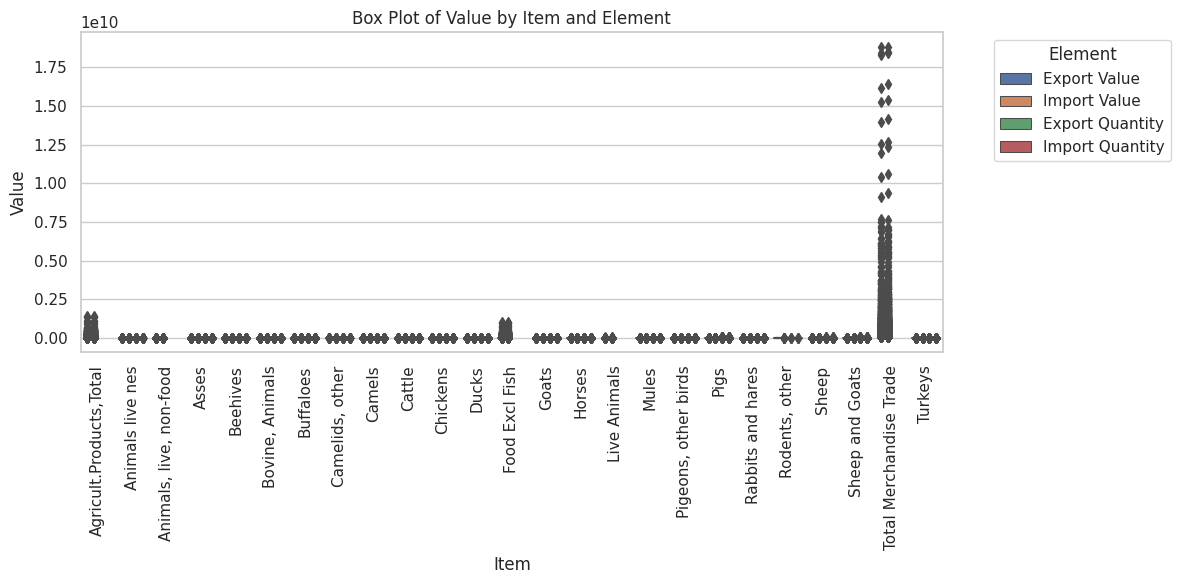

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better visualization

# Assuming df3 is your DataFrame

# Create a figure and axes for the box plots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Set a seaborn style for better visualization

# Create a box plot grouped by 'Element' for each 'Item'
sns.boxplot(data=df3, x='Item', y='Value', hue='Element')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Item')
plt.ylabel('Value')
plt.title('Box Plot of Value by Item and Element')
plt.legend(title='Element', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


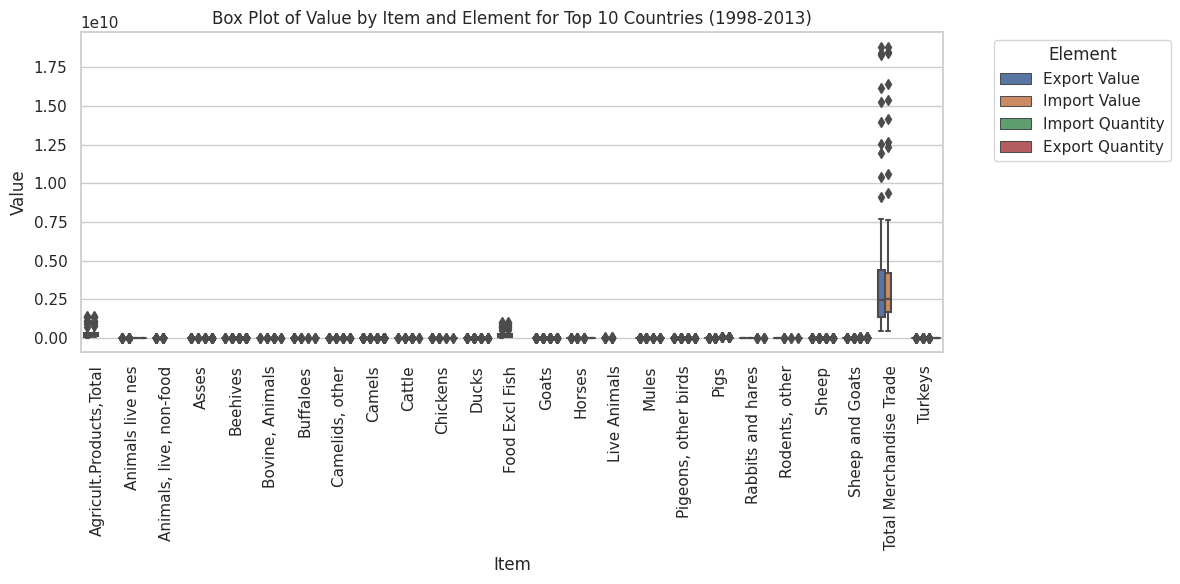

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df3 is your DataFrame

# Filter data for the last 15 years
end_year = df3['Year'].max()
start_year = end_year - 15
filtered_df = df3[(df3['Year'] >= start_year) & (df3['Year'] <= end_year)]

# Get the top 10 countries by some criteria (e.g., 'Value' column)
top_10_countries = filtered_df.groupby('Country')['Value'].sum().nlargest(10).index

# Filter data for the top 10 countries
filtered_df = filtered_df[filtered_df['Country'].isin(top_10_countries)]

# Create a figure and axes for the box plots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a box plot grouped by 'Element' for each 'Item' within the top 10 countries
sns.boxplot(data=filtered_df, x='Item', y='Value', hue='Element')
plt.xticks(rotation=90)
plt.xlabel('Item')
plt.ylabel('Value')
plt.title(f'Box Plot of Value by Item and Element for Top 10 Countries ({start_year}-{end_year})')
plt.legend(title='Element', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


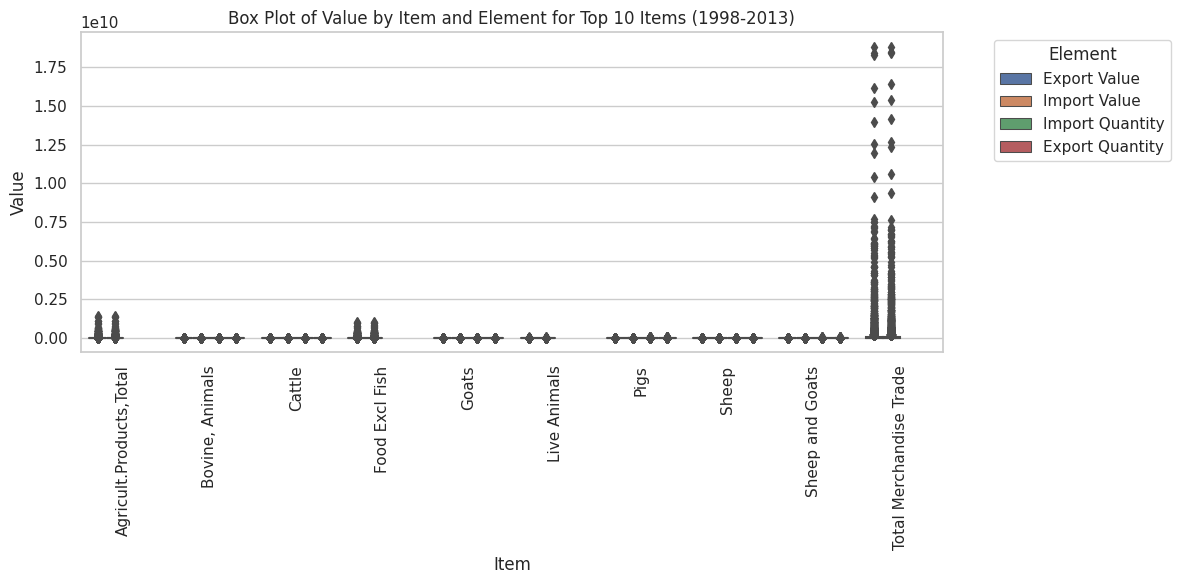

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df3 is your DataFrame

# Filter data for the last 15 years
end_year = df3['Year'].max()
start_year = end_year - 15
filtered_df = df3[(df3['Year'] >= start_year) & (df3['Year'] <= end_year)]

# Get the top 10 items by some criteria (e.g., 'Value' column)
top_10_items = filtered_df.groupby('Item')['Value'].sum().nlargest(10).index

# Filter data for the top 10 items
filtered_df = filtered_df[filtered_df['Item'].isin(top_10_items)]

# Create a figure and axes for the box plots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a box plot grouped by 'Element' for each 'Item' within the top 10 items
sns.boxplot(data=filtered_df, x='Item', y='Value', hue='Element')
plt.xticks(rotation=90)
plt.xlabel('Item')
plt.ylabel('Value')
plt.title(f'Box Plot of Value by Item and Element for Top 10 Items ({start_year}-{end_year})')
plt.legend(title='Element', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


<ipython-input-111-9c589fdf6f1a>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_df, x='Item', y='Value', hue='Element', ci=None)


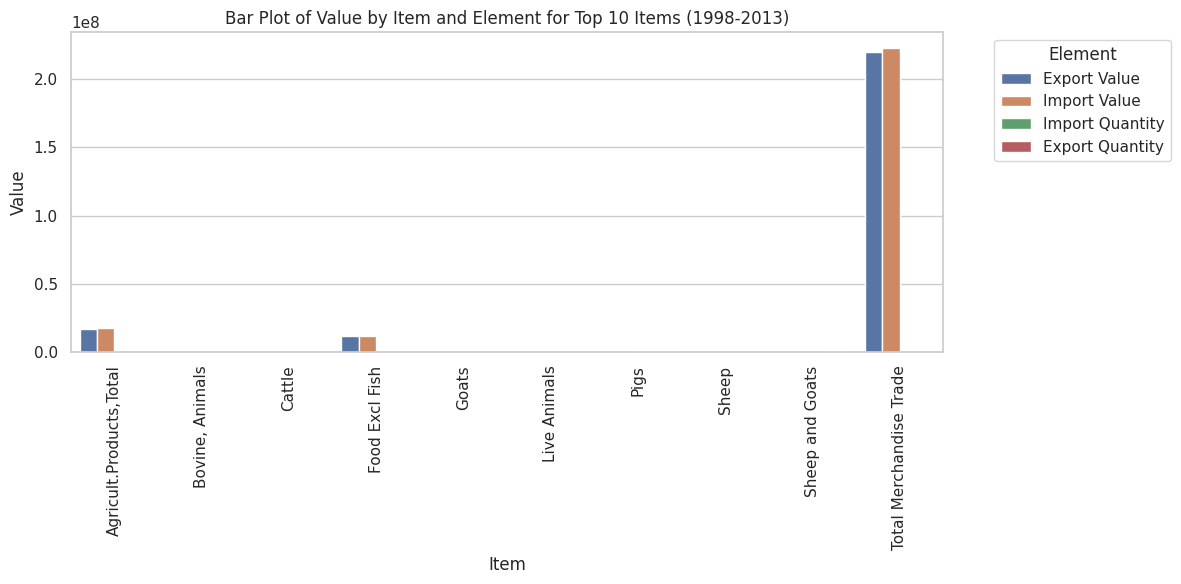

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df3 is your DataFrame

# Filter data for the last 15 years
end_year = df3['Year'].max()
start_year = end_year - 15
filtered_df = df3[(df3['Year'] >= start_year) & (df3['Year'] <= end_year)]

# Get the top 10 items by some criteria (e.g., 'Value' column)
top_10_items = filtered_df.groupby('Item')['Value'].sum().nlargest(10).index

# Filter data for the top 10 items
filtered_df = filtered_df[filtered_df['Item'].isin(top_10_items)]

# Create a figure and axes for the bar plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a bar plot grouped by 'Item' for each 'Element' within the top 10 items
sns.barplot(data=filtered_df, x='Item', y='Value', hue='Element', ci=None)
plt.xticks(rotation=90)
plt.xlabel('Item')
plt.ylabel('Value')
plt.title(f'Bar Plot of Value by Item and Element for Top 10 Items ({start_year}-{end_year})')
plt.legend(title='Element', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


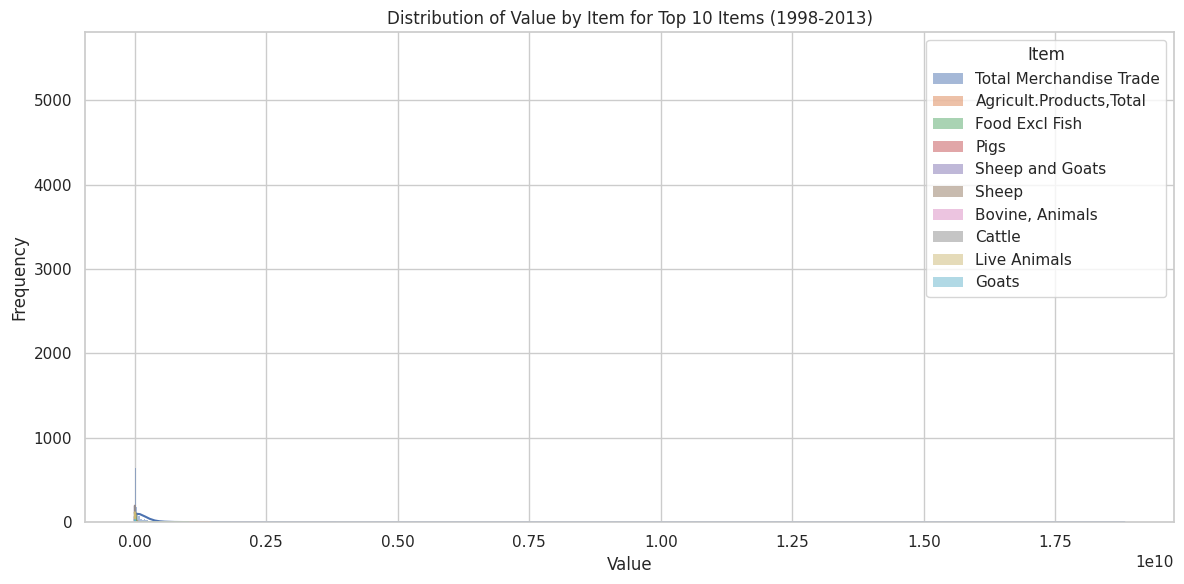

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df3 is your DataFrame

# Filter data for the last 15 years
end_year = df3['Year'].max()
start_year = end_year - 15
filtered_df = df3[(df3['Year'] >= start_year) & (df3['Year'] <= end_year)]

# Get the top 10 items by some criteria (e.g., 'Value' column)
top_10_items = filtered_df.groupby('Item')['Value'].sum().nlargest(10).index

# Create a figure and axes for the distribution plots
plt.figure(figsize=(12, 6))

# Iterate through the top 10 items and create a distribution plot for each 'Item'
for item in top_10_items:
    item_data = filtered_df[filtered_df['Item'] == item]['Value']
    sns.histplot(item_data, kde=True, label=item)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Distribution of Value by Item for Top 10 Items ({start_year}-{end_year})')
plt.legend(title='Item')

plt.tight_layout()
plt.show()


In [114]:
# let us sort the df3 dataset by 'Element' then by 'Value' and further inspect the data, 'Value' column

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df3['Item'].unique())

# Create an empty list to store sorted DataFrames for each element
sorted_dfs = []

# Iterate through unique elements and sort within each group by 'Value'
for element in unique_elements:
    subset = df3[df3['Item'] == element]
    sorted_subset = subset.sort_values(by='Value')
    sorted_dfs.append(sorted_subset)

# Concatenate the sorted DataFrames back together
sorted_df3 = pd.concat(sorted_dfs)

# Display the sorted DataFrame
print(sorted_df3.head())

               Country                     Item       Element  Value  Year
285321        Maldives  Agricult.Products,Total  Export Value    1.0  2009
285302        Maldives  Agricult.Products,Total  Export Value    2.0  1990
285318        Maldives  Agricult.Products,Total  Export Value    2.0  2006
285304        Maldives  Agricult.Products,Total  Export Value    3.0  1992
8156    American Samoa  Agricult.Products,Total  Export Value    3.0  2008


In [116]:
# So, to work with meaningful data, let us set a cutoff value of  'Value' > 10000 (a meaningful cutoff in livestock trade), for import and export quntities in
# Let us save df3 as df4 after filtered by 'Value' > 10000
# The analysis showed that there are a total of 23257 rows of data where 'Value' > 10000

# Sort the DataFrame by 'Element' and 'Value'
sorted_df3 = df3.sort_values(by=['Value', 'Element'])

# Filter rows where 'Value' is greater than 10000
df4= sorted_df3[sorted_df3['Value'] > 10000]

# Count the number of rows
num_rows = len(df4)

# Display the count
print(f"Number of rows where 'Value' > 10000: {num_rows}")

Number of rows where 'Value' > 10000: 150322


In [117]:
df4.shape

(150322, 5)

In [120]:
# Now, we have relatively better data for further analysis
df4['Value'].describe()

count    1.503220e+05
mean     1.794625e+07
std      2.442591e+08
min      1.000100e+04
25%      3.869475e+04
50%      1.637515e+05
75%      1.030806e+06
max      1.881876e+10
Name: Value, dtype: float64

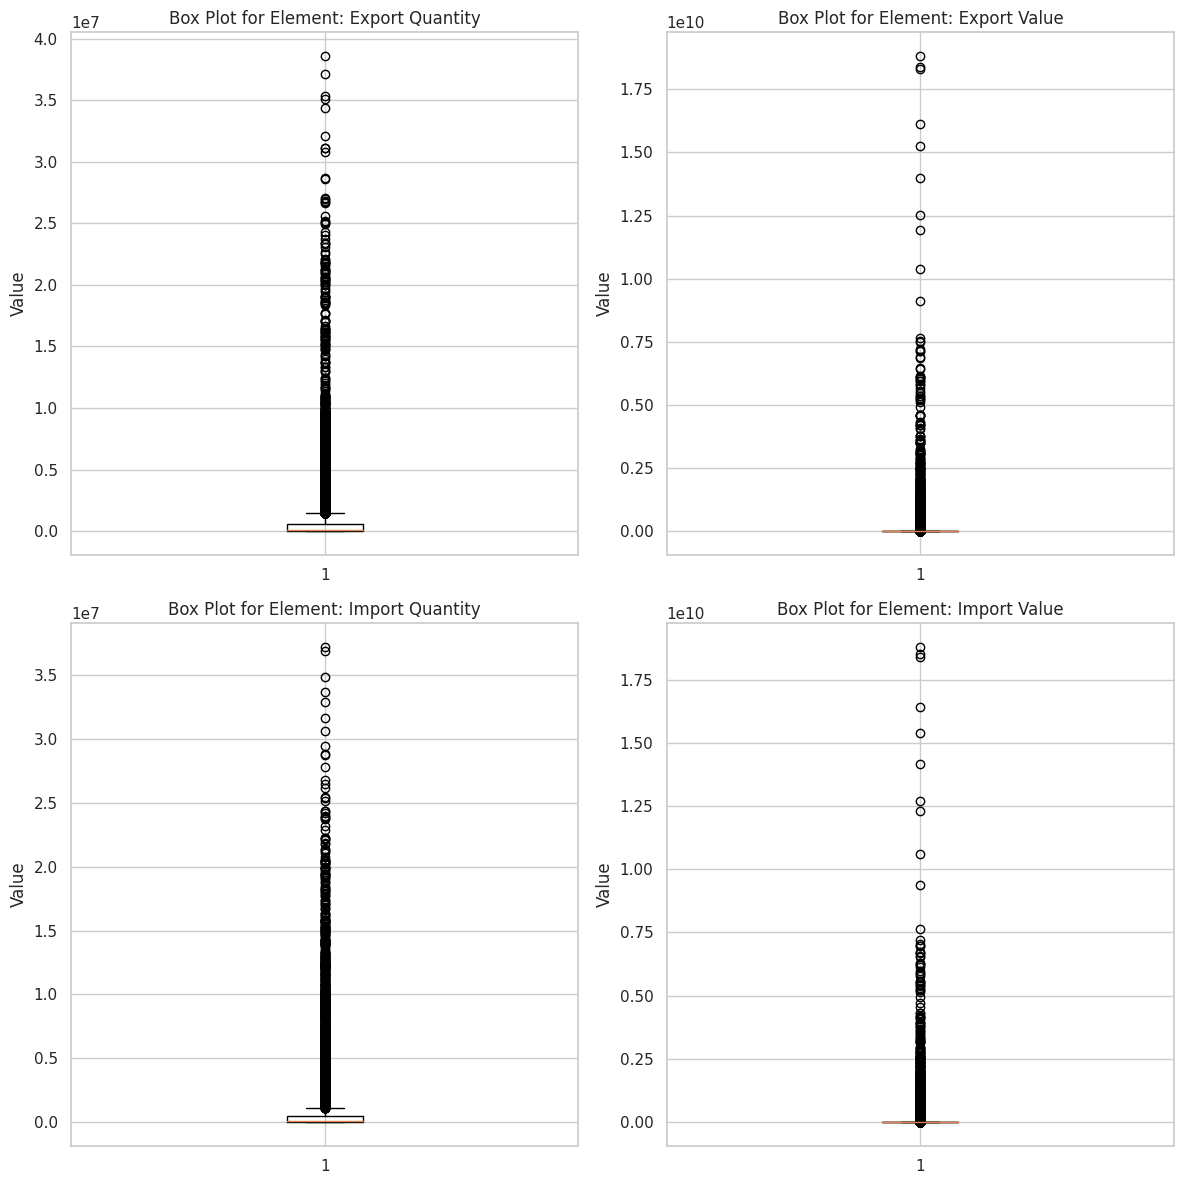

In [121]:
# let us visualize this df4 dataset (N.B, this is the version of the original dataset after it was corrected for missing values, zero values, cutoff value)

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df4['Element'].unique())

# Sort the DataFrame by the 'Element' column
sorted_df = df4.sort_values(by='Element')

# Create a figure and axes for the box plots
num_plots = len(unique_elements)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = -(-num_plots // num_cols)  # Ceiling division
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array if needed
axes = axes.flatten()

# Iterate through unique elements and create box plots
for index, element in enumerate(unique_elements):
    subset = sorted_df[sorted_df['Element'] == element]
    ax = axes[index]
    ax.boxplot(subset['Value'])
    ax.set_title(f'Box Plot for Element: {element}')
    ax.set_ylabel('Value')

# Hide any unused subplots
for index in range(len(unique_elements), num_rows * num_cols):
    axes[index].axis('off')

plt.tight_layout()
plt.show()

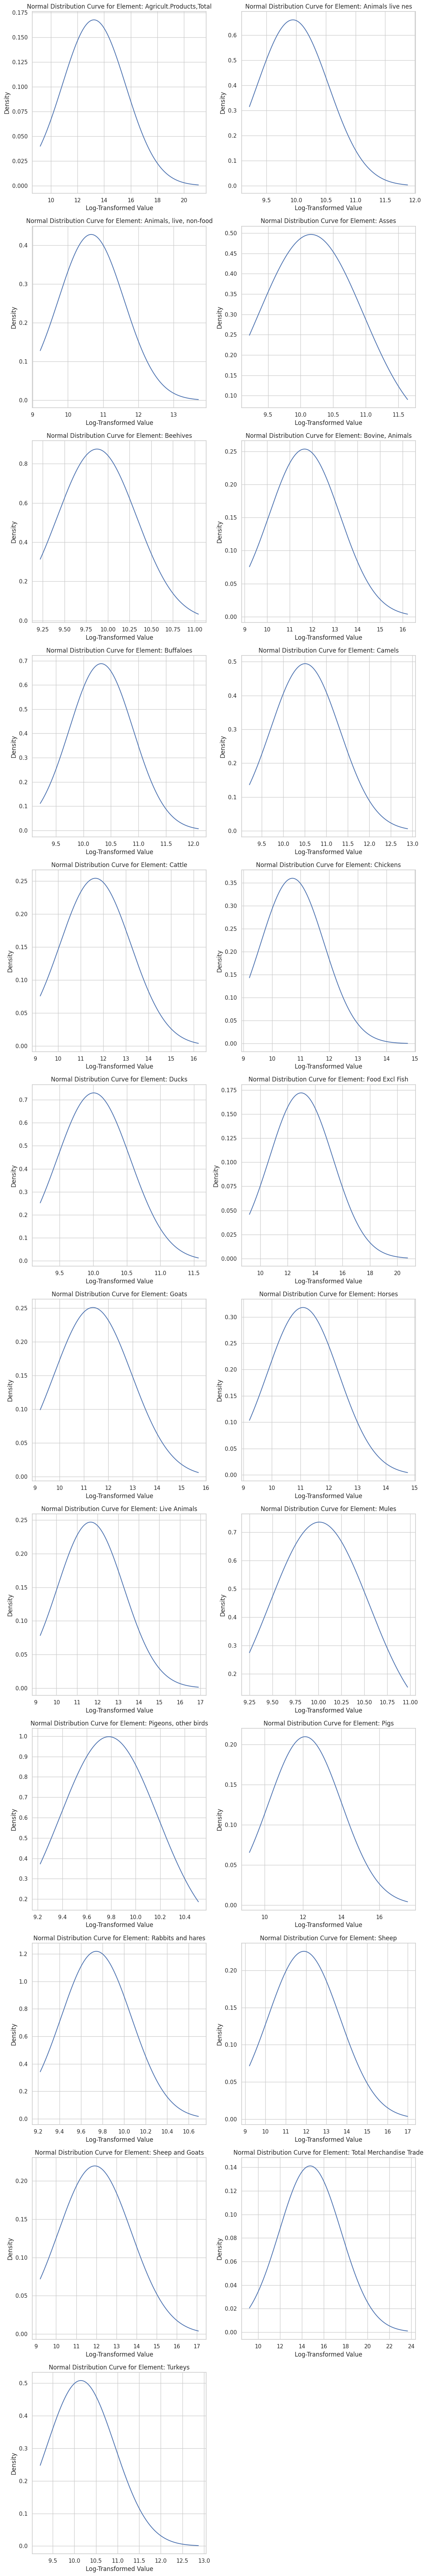

In [124]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm  # Import norm from scipy.stats

# Assuming df4 is your DataFrame

# Sort the DataFrame by 'Element' and 'Value'
sorted_df2 = df4.sort_values(by=['Item', 'Element'])

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(sorted_df2['Item'].unique())

# Create a figure and axes for the normal distribution curves
num_plots = len(unique_elements)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = -(-num_plots // num_cols)  # Ceiling division
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array if needed
axes = axes.flatten()

# Iterate through unique elements, log transform, and create normal distribution curves
for index, element in enumerate(unique_elements):
    subset = sorted_df2[sorted_df2['Item'] == element]

    # Log transform the 'Value' column
    log_transformed_values = np.log(subset['Value'])

    mean_value = log_transformed_values.mean()
    std_dev_value = log_transformed_values.std()

    x = np.linspace(log_transformed_values.min(), log_transformed_values.max(), 1000)
    y = norm.pdf(x, mean_value, std_dev_value)

    ax = axes[index]
    ax.plot(x, y)
    ax.set_title(f'Normal Distribution Curve for Element: {element}')
    ax.set_xlabel('Log-Transformed Value')
    ax.set_ylabel('Density')

# Hide any unused subplots
for index in range(len(unique_elements), num_rows * num_cols):
    axes[index].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


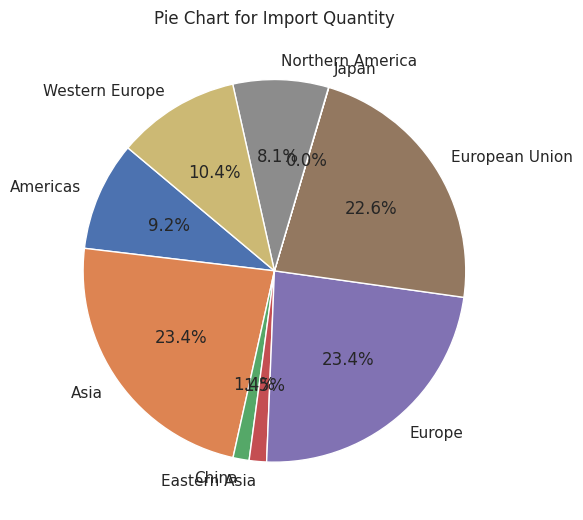

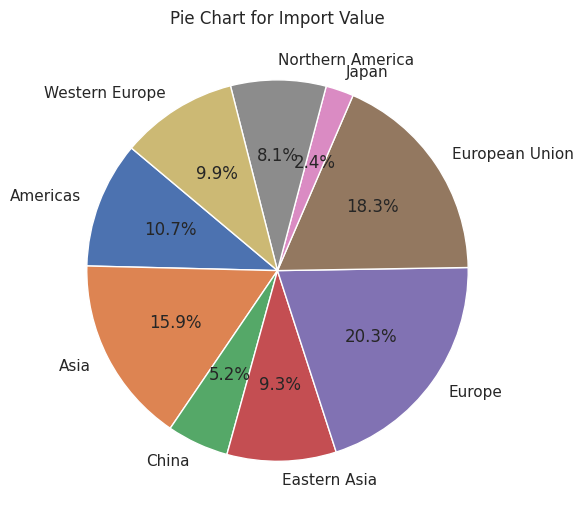

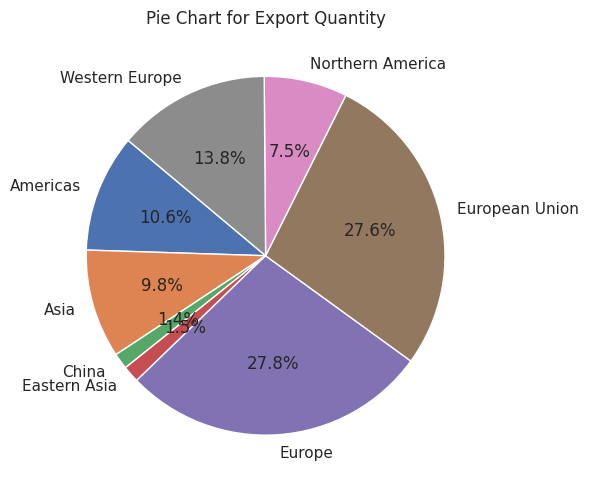

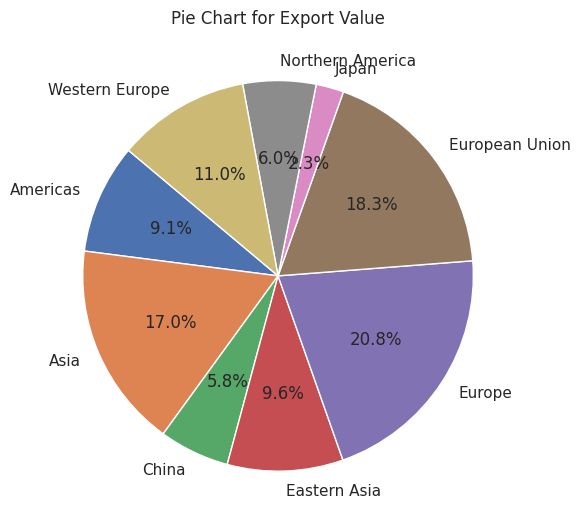

In [126]:
# Sort the DataFrame by 'Element'
sorted_df = df4.sort_values(by='Element')

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(sorted_df['Element'].unique())

# Filter the DataFrame for the last ten years
last_ten_years = sorted_df[sorted_df['Year'] >= sorted_df['Year'].max() - 14]

# Get the top 10 countries based on the mean 'Value' over the last ten years
top_countries = last_ten_years.groupby('Country')['Value'].mean().sort_values(ascending=False).head(10).index

# Exclude 'World' from the top countries
top_countries = top_countries[top_countries != 'World']

# Create four pie charts for import and export quantities/values
for element in ['Import Quantity', 'Import Value', 'Export Quantity', 'Export Value']:
    plt.figure(figsize=(6, 6))
    plt.title(f'Pie Chart for {element}')

    subset = last_ten_years[(last_ten_years['Element'] == element) & (last_ten_years['Country'].isin(top_countries))]
    values = subset.groupby('Country')['Value'].sum()

    plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=140)
    plt.tight_layout()
    plt.show()

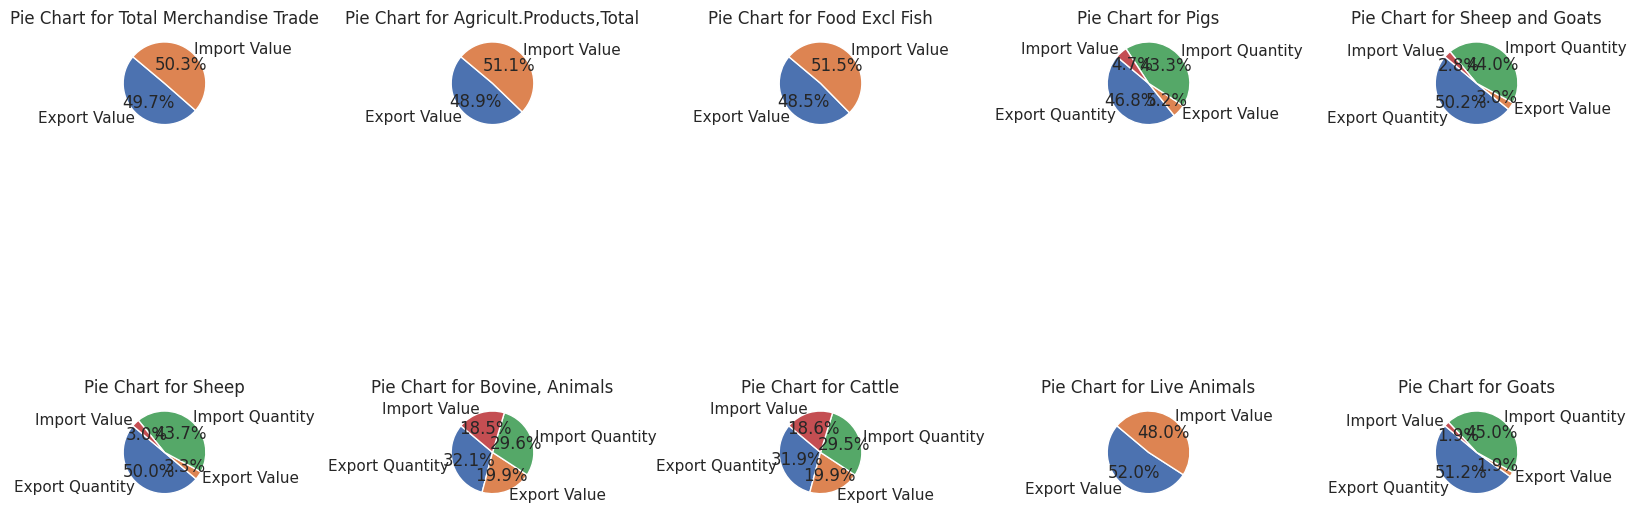

In [128]:
import matplotlib.pyplot as plt

# Assuming df4 is your DataFrame

# Filter data for the last 15 years
end_year = df4['Year'].max()
start_year = end_year - 15
filtered_df = df4[(df4['Year'] >= start_year) & (df4['Year'] <= end_year)]

# Get the top 10 products based on some criteria (e.g., 'Value' column)
top_10_products = filtered_df.groupby('Item')['Value'].sum().nlargest(10).index

# Create a figure and axes for the pie charts
plt.figure(figsize=(16, 8))

# Iterate through the top 10 products and create a pie chart for each 'Item'
for index, product in enumerate(top_10_products):
    plt.subplot(2, 5, index + 1)

    # Filter data for the current product
    product_data = filtered_df[filtered_df['Item'] == product]

    # Sum the 'Value' for each element within the product
    element_values = product_data.groupby('Element')['Value'].sum()

    # Create a pie chart
    plt.pie(element_values, labels=element_values.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart for {product}')

# Adjust layout
plt.tight_layout()
plt.show()


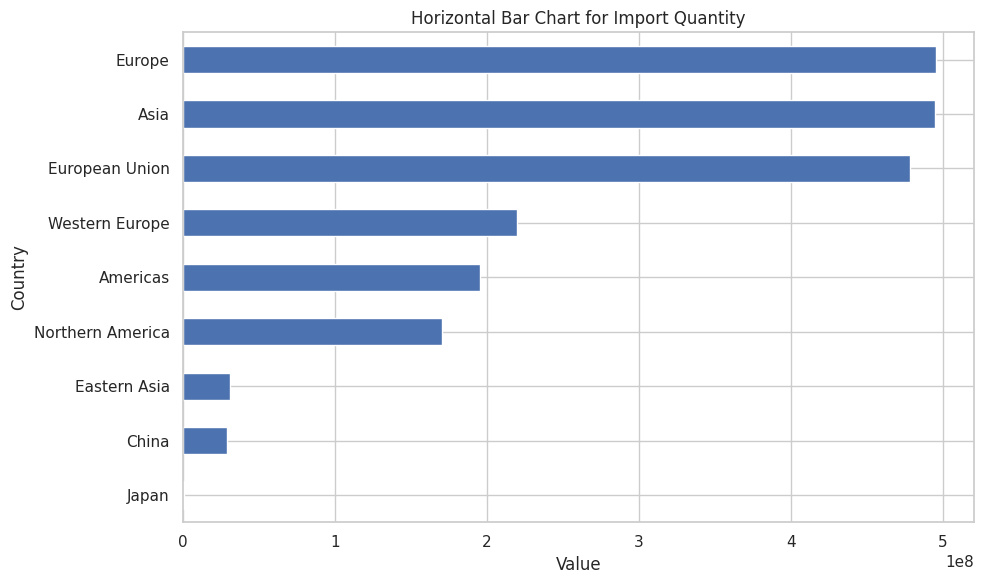

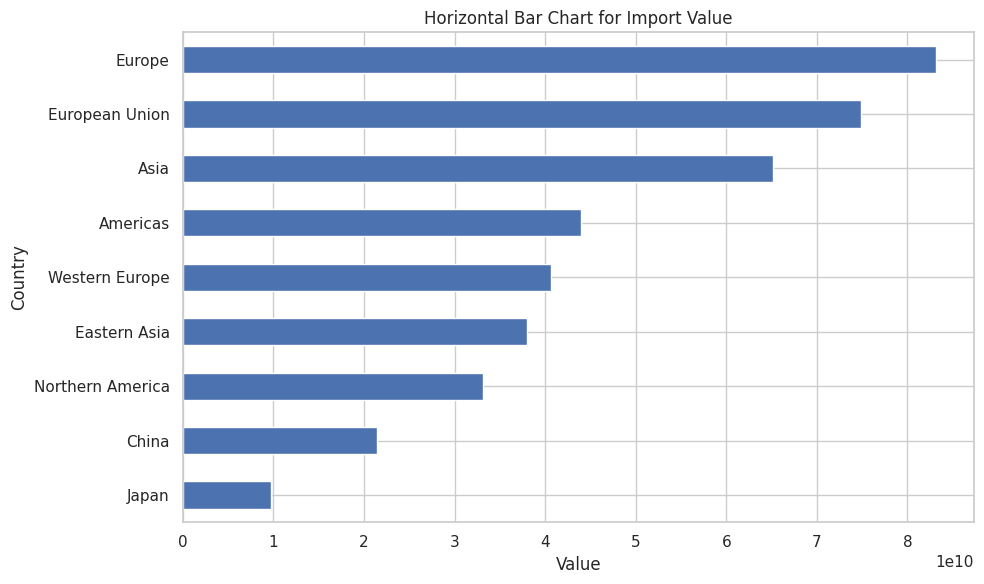

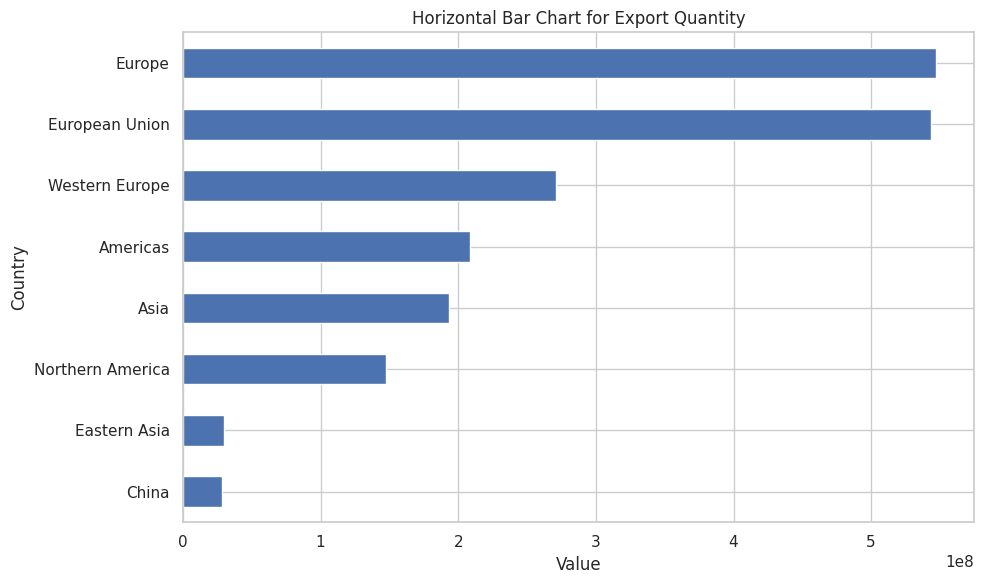

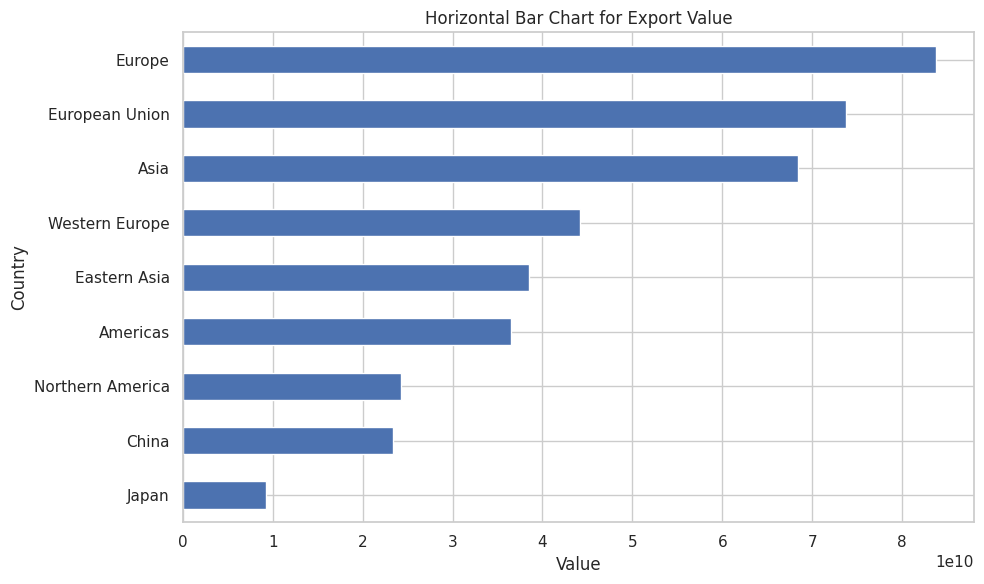

In [130]:
import matplotlib.pyplot as plt

# Assuming df4 is your DataFrame

# Sort the DataFrame by 'Item'
sorted_df = df4.sort_values(by='Item')

# Get the unique values in the 'Item' column and sort them
unique_items = sorted(sorted_df['Item'].unique())

# Filter the DataFrame for the last ten years
last_ten_years = sorted_df[sorted_df['Year'] >= sorted_df['Year'].max() - 14]

# Get the top 10 countries based on the mean 'Value' over the last ten years
top_countries = last_ten_years.groupby('Country')['Value'].mean().sort_values(ascending=False).head(10).index

# Exclude 'World' from the top countries
top_countries = top_countries[top_countries != 'World']

# Create four horizontal bar charts for import and export quantities/values
for element in ['Import Quantity', 'Import Value', 'Export Quantity', 'Export Value']:
    plt.figure(figsize=(10, 6))
    plt.title(f'Horizontal Bar Chart for {element}')

    subset = last_ten_years[(last_ten_years['Element'] == element) & (last_ten_years['Country'].isin(top_countries))]
    values = subset.groupby('Country')['Value'].sum()

    values_sorted = values.sort_values(ascending=True)  # Sort values in ascending order

    values_sorted.plot(kind='barh')
    plt.xlabel('Value')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()


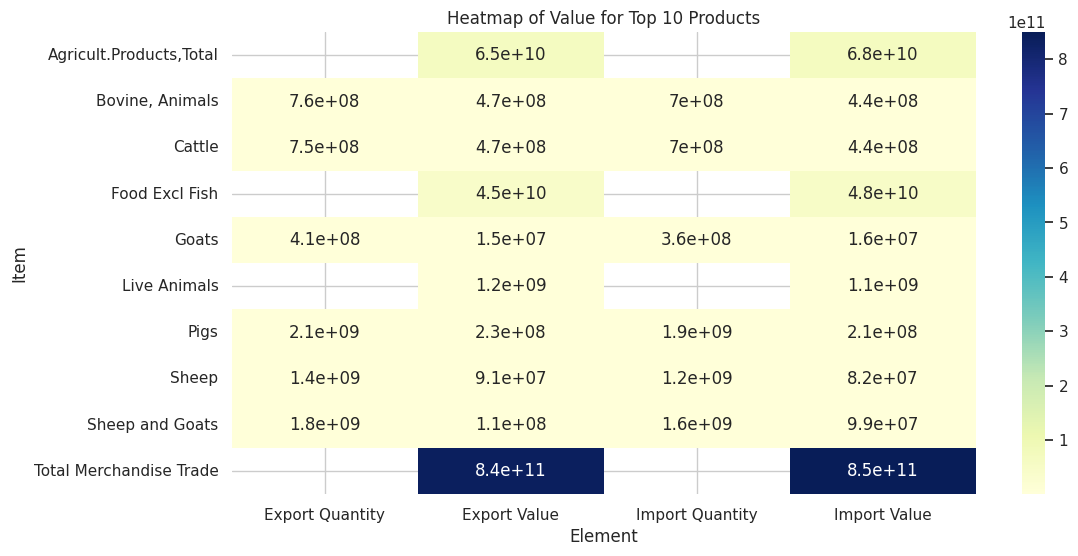

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df4 is your DataFrame

# Filter data for the last 15 years
end_year = df4['Year'].max()
start_year = end_year - 15
filtered_df = df4[(df4['Year'] >= start_year) & (df4['Year'] <= end_year)]

# Get the top 10 products based on some criteria (e.g., 'Value' column)
top_10_products = filtered_df.groupby('Item')['Value'].sum().nlargest(10).index

# Filter data for the top 10 products
filtered_df = filtered_df[filtered_df['Item'].isin(top_10_products)]

# Pivot the data to create a heatmap
heatmap_data = filtered_df.pivot_table(index='Item', columns='Element', values='Value', aggfunc='sum')

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Value for Top 10 Products')
plt.xlabel('Element')
plt.ylabel('Item')
plt.show()


In [145]:
# Sort the DataFrame by 'Item'
sorted_df = df4.sort_values(by='Item')

# Filter the DataFrame for the last ten years
last_ten_years = sorted_df[sorted_df['Year'] >= sorted_df['Year'].max() - 14]

# Get the top 10 countries based on the mean 'Value' over the last ten years
top_countries = last_ten_years.groupby('Country')['Value'].mean().sort_values(ascending=False).head(10).index

# Exclude 'World' from the top countries
top_countries = top_countries[top_countries != 'World']

# Select the desired elements for the summary table
summary_elements = ['Import Quantity', 'Import Value', 'Export Quantity', 'Export Value']

# Filter the DataFrame to include only the desired elements and countries
subset = last_ten_years[(last_ten_years['Element'].isin(summary_elements)) & (last_ten_years['Country'].isin(top_countries))]

# Pivot the data to create a summary table with mean and std
summary_table = subset.pivot_table(index='Country', columns='Element', values='Value', aggfunc=['mean', 'std'])

# Display the summary table
print(summary_table)


                            mean                                              \
Element          Export Quantity  Export Value Import Quantity  Import Value   
Country                                                                        
Americas            1.582844e+06  1.817120e+08    1.436139e+06  2.222176e+08   
Asia                1.389030e+06  2.876421e+08    3.114414e+06  2.658871e+08   
China               5.419388e+05  3.294540e+08    5.982926e+05  2.045434e+08   
Eastern Asia        3.450329e+05  2.675533e+08    4.023527e+05  2.246340e+08   
Europe              3.909518e+06  3.692105e+08    3.491464e+06  3.833915e+08   
European Union      3.883673e+06  3.262655e+08    3.395047e+06  3.484910e+08   
Japan                        NaN  1.679410e+08    1.823420e+04  7.960393e+07   
Northern America    1.137605e+06  1.292532e+08    1.409406e+06  1.862127e+08   
Western Europe      1.979021e+06  2.063715e+08    1.831807e+06  1.919948e+08   

                             std       

In [143]:
# Sort the DataFrame by 'Item'
sorted_df = df4.sort_values(by='Item')

# Filter the DataFrame for the last ten years
last_ten_years = sorted_df[sorted_df['Year'] >= sorted_df['Year'].max() - 14]

# Get the top 10 countries based on the mean 'Value' over the last ten years
top_countries = last_ten_years.groupby('Country')['Value'].mean().sort_values(ascending=False).head(10).index

# Exclude 'World' from the top countries
top_countries = top_countries[top_countries != 'World']

# Select the desired elements for the summary table
summary_elements = ['Import Quantity', 'Import Value', 'Export Quantity', 'Export Value']

# Filter the DataFrame to include only the desired elements and countries
subset = last_ten_years[(last_ten_years['Item'].isin(summary_elements)) & (last_ten_years['Country'].isin(top_countries))]

# Pivot the data to create a summary table with mean and std
summary_table = subset.pivot_table(index='Country', columns='Item', values='Value', aggfunc=['mean', 'std'])

# Display the summary table
print(summary_table)


Empty DataFrame
Columns: []
Index: []


In [144]:
# Sort the DataFrame by 'Item'
sorted_df = df4.sort_values(by='Item')

# Continue with your data analysis or visualization code as needed


In [149]:
import pandas as pd

# Assuming df4 is your DataFrame sorted by 'Item'

# Filter the DataFrame for the last ten years
last_ten_years = df4[df4['Year'] >= df4['Year'].max() - 14]

# Get the top 10 countries based on the mean 'Value' over the last ten years
top_countries = last_ten_years.groupby('Country')['Value'].mean().sort_values(ascending=False).head(10).index

# Exclude 'World' from the top countries
top_countries = top_countries[top_countries != 'World']

# Select the desired elements for summary statistics
summary_elements = ['Import Quantity', 'Import Value', 'Export Quantity', 'Export Value']

# Filter the DataFrame to include only the desired elements and countries
subset = last_ten_years[(last_ten_years['Element'].isin(summary_elements)) & (last_ten_years['Country'].isin(top_countries))]

# Pivot the data to create a summary table with summary statistics (mean and std)
summary_table = subset.pivot_table(index=['Country', 'Item'], columns='Element', values='Value', aggfunc=['mean', 'std'])

# Display the summary table
print(summary_table)


                                                  mean                \
Element                                Export Quantity  Export Value   
Country        Item                                                    
Americas       Agricult.Products,Total             NaN  2.301561e+08   
               Animals, live, non-food             NaN  1.152685e+05   
               Asses                      1.106800e+04           NaN   
               Beehives                   1.760100e+04  1.832267e+04   
               Bovine, Animals            2.963486e+06  2.014519e+06   
...                                                ...           ...   
Western Europe Rabbits and hares                   NaN  1.470555e+04   
               Sheep                      1.040612e+06  8.158287e+04   
               Sheep and Goats            1.136553e+06  8.584527e+04   
               Total Merchandise Trade             NaN  2.584942e+09   
               Turkeys                    3.570960e+04  1.089154

Country    0
Item       0
Element    0
Value      0
Year       0
dtype: int64

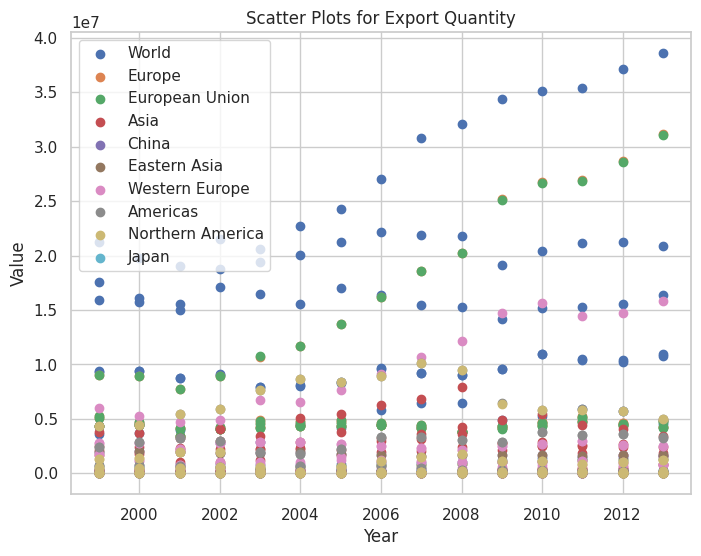

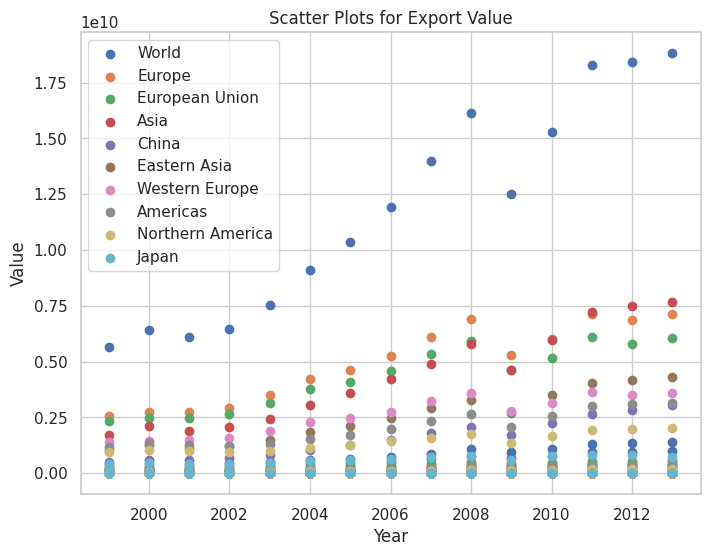

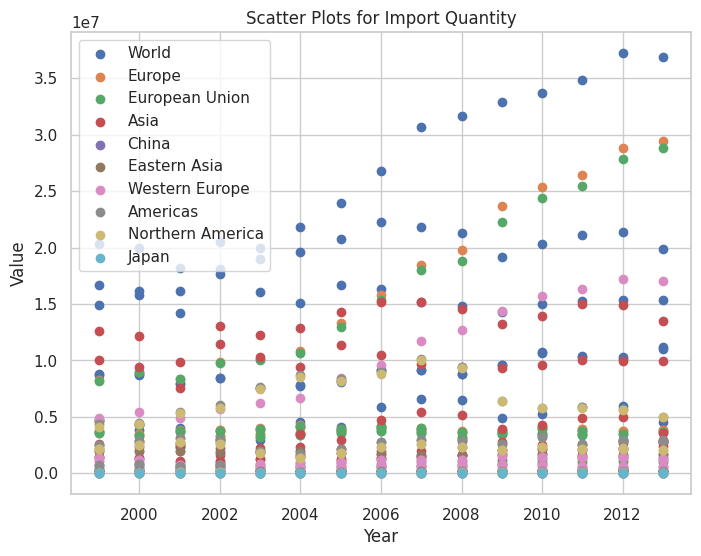

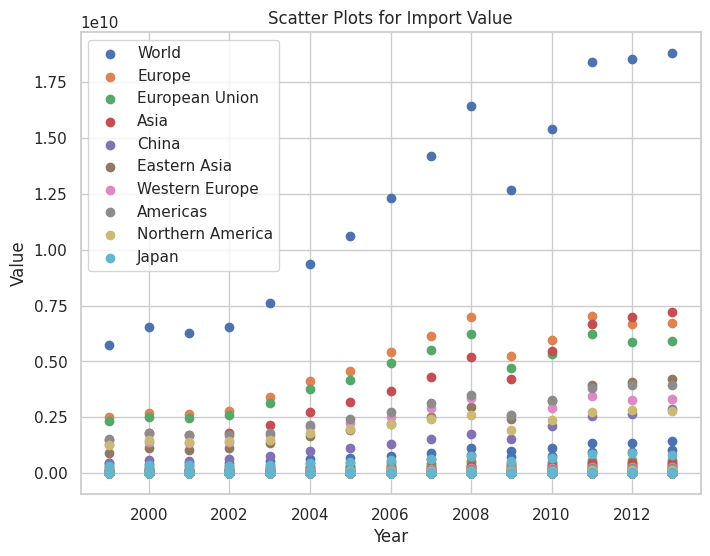

In [153]:
# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df4['Element'].unique())

# Sort the DataFrame by the 'Element' column
sorted_df2 = df4.sort_values(by='Element')

# Filter the DataFrame for the last ten years
last_ten_years = sorted_df2[sorted_df2['Year'] >= sorted_df2['Year'].max() - 14]

# Get the top 10 countries based on the mean 'Value' over the last ten years
top_countries = last_ten_years.groupby('Country')['Value'].mean().sort_values(ascending=False).head(10).index

# Create scatter plots for the top 10 countries for each unique element
for element in unique_elements:
    plt.figure(figsize=(8, 6))
    plt.title(f'Scatter Plots for {element}')
    plt.xlabel('Year')
    plt.ylabel('Value')

    for country in top_countries:
        subset = last_ten_years[(last_ten_years['Element'] == element) & (last_ten_years['Country'] == country)]
        plt.scatter(subset['Year'], subset['Value'], label=country)

    plt.legend()
    plt.show()

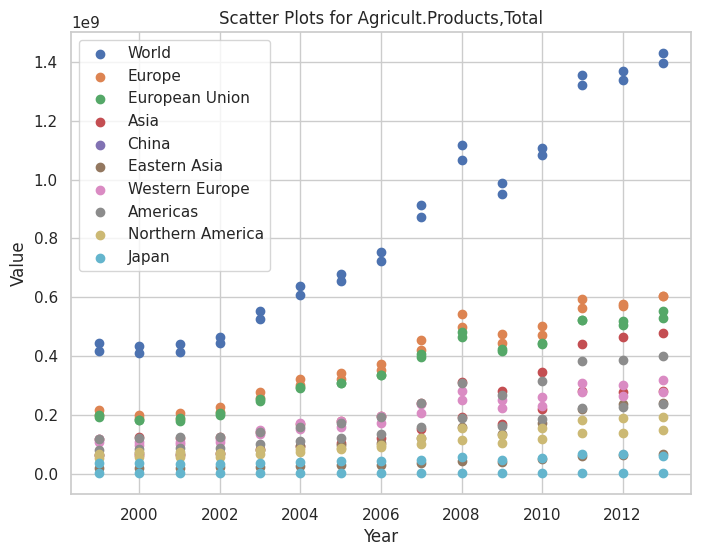

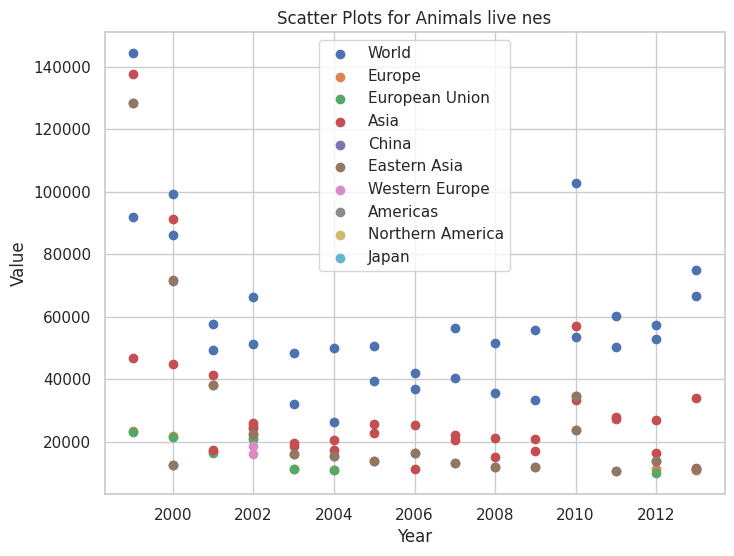

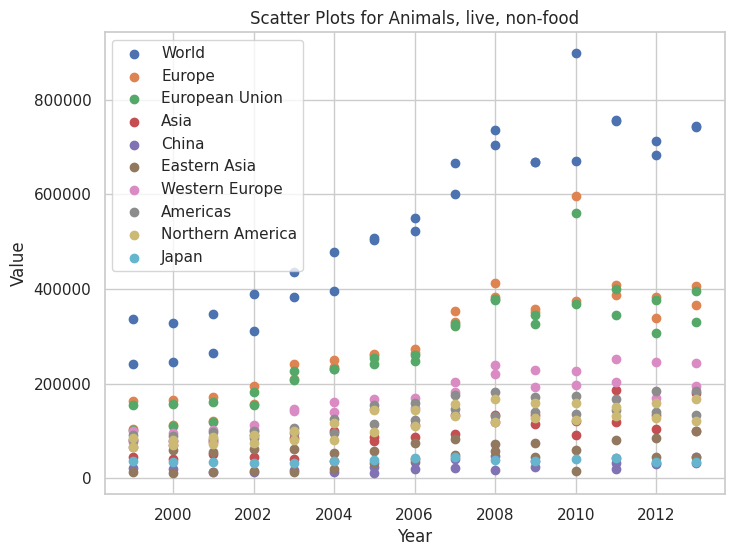

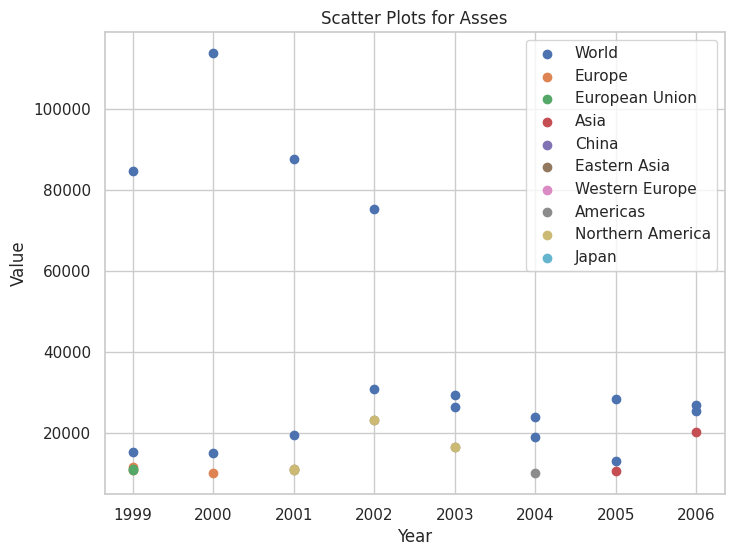

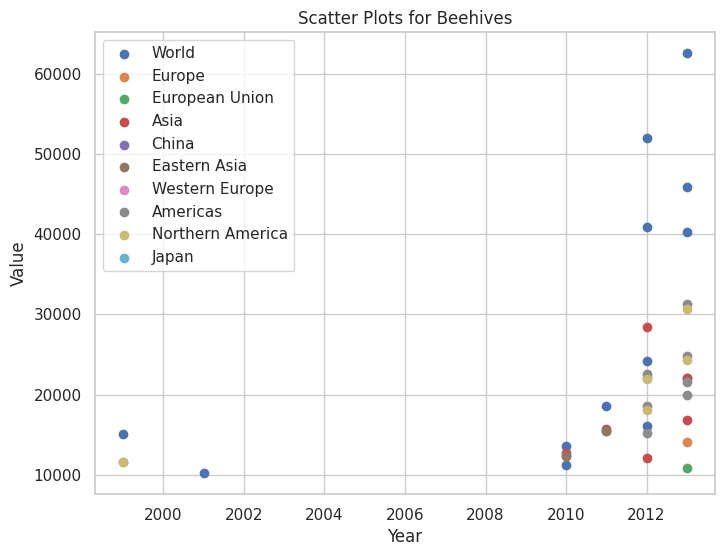

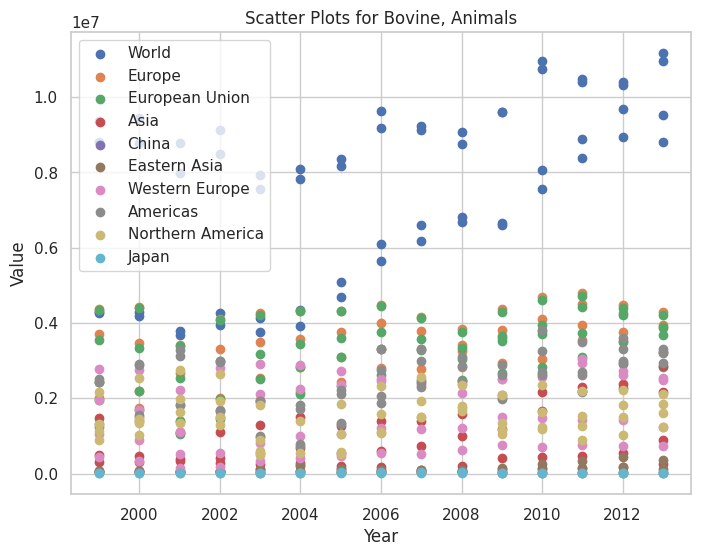

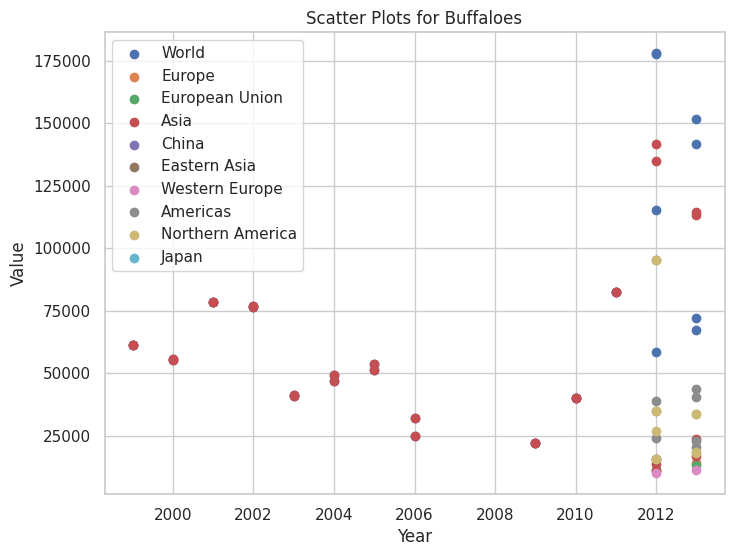

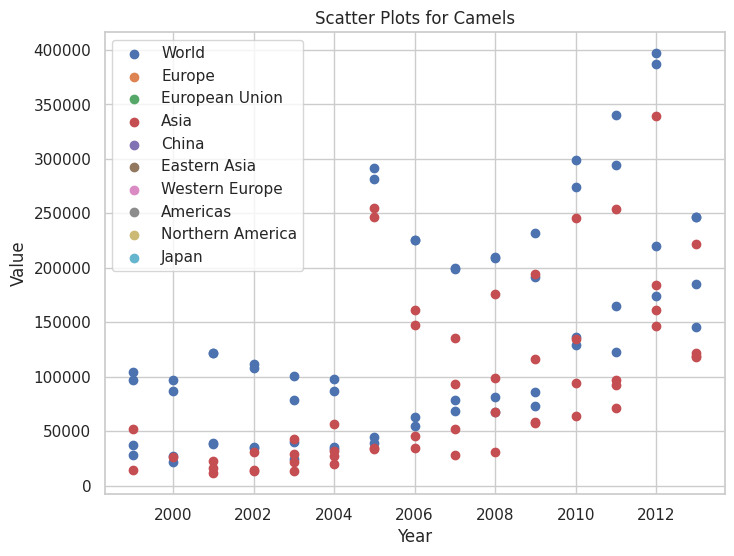

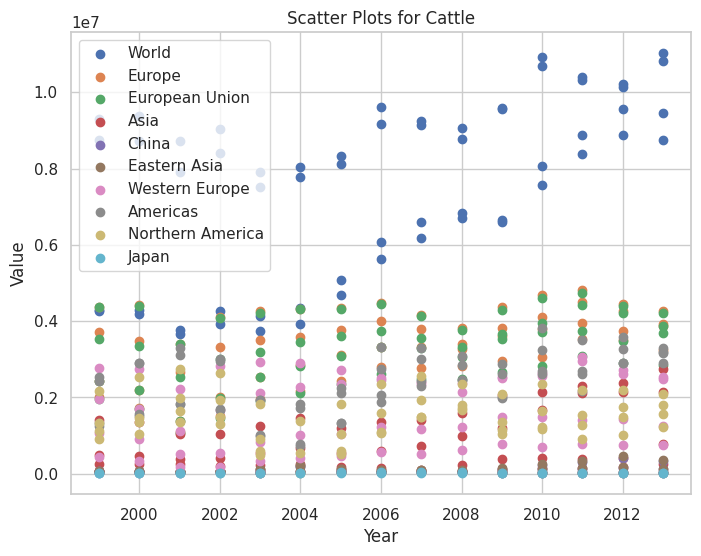

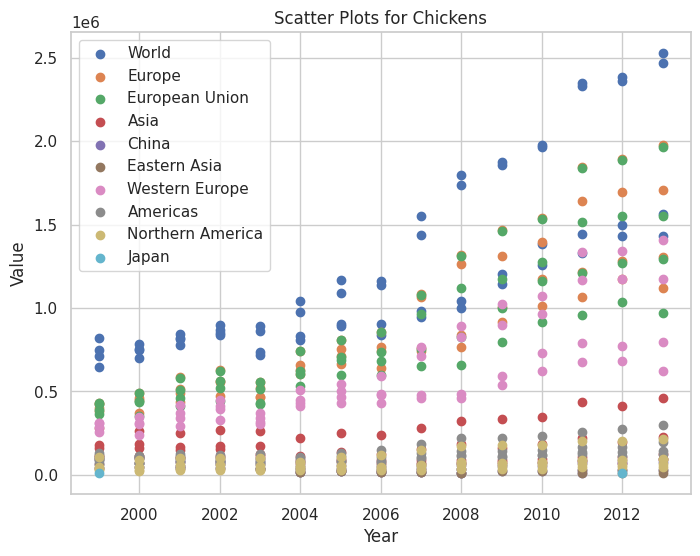

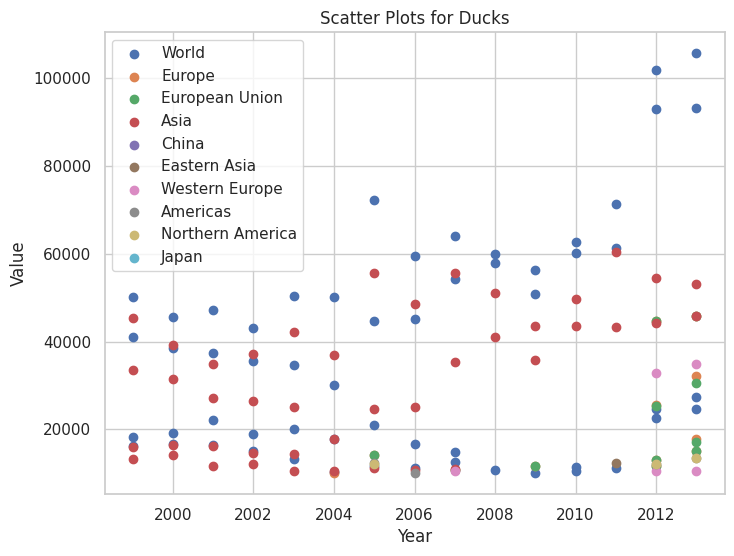

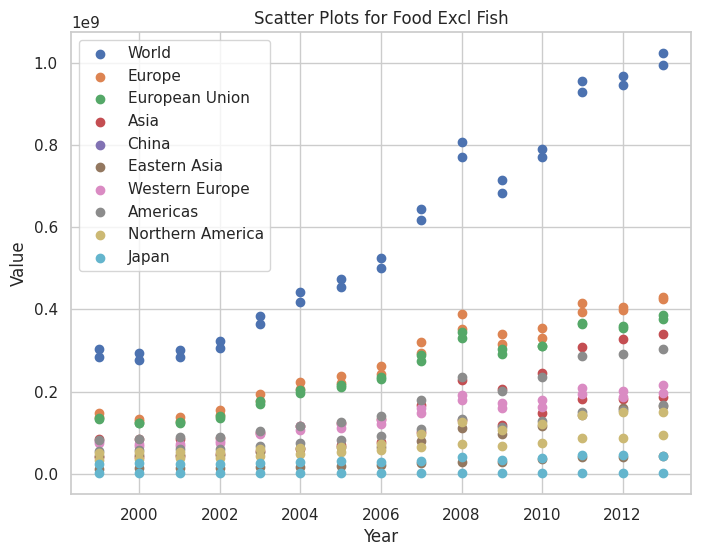

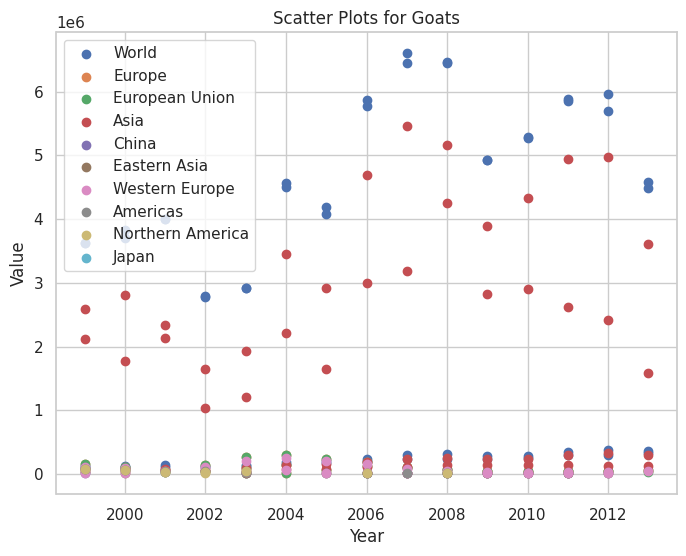

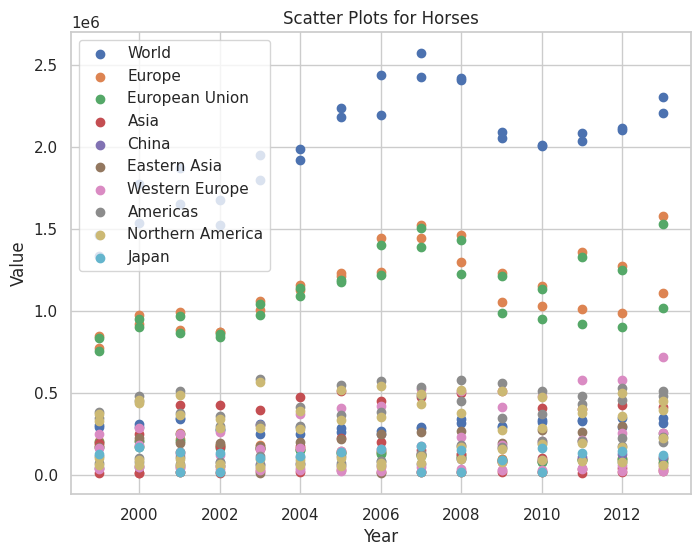

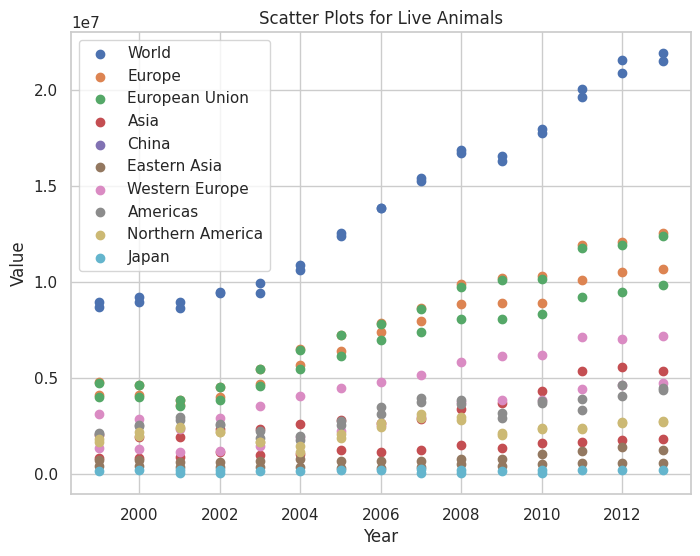

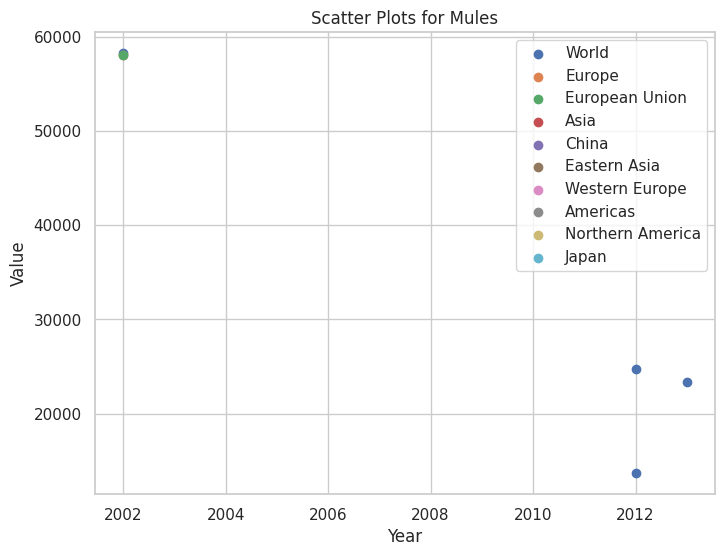

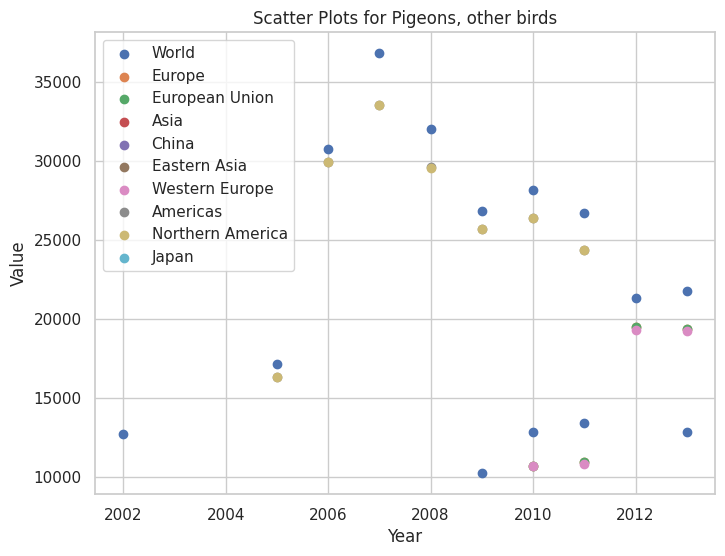

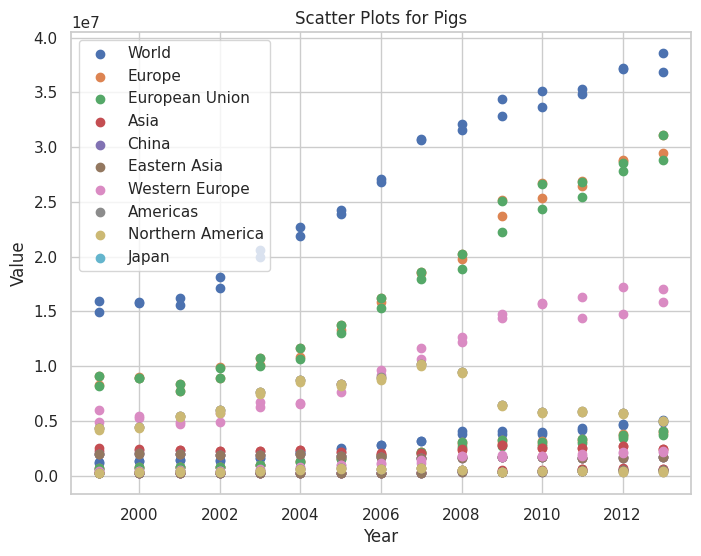

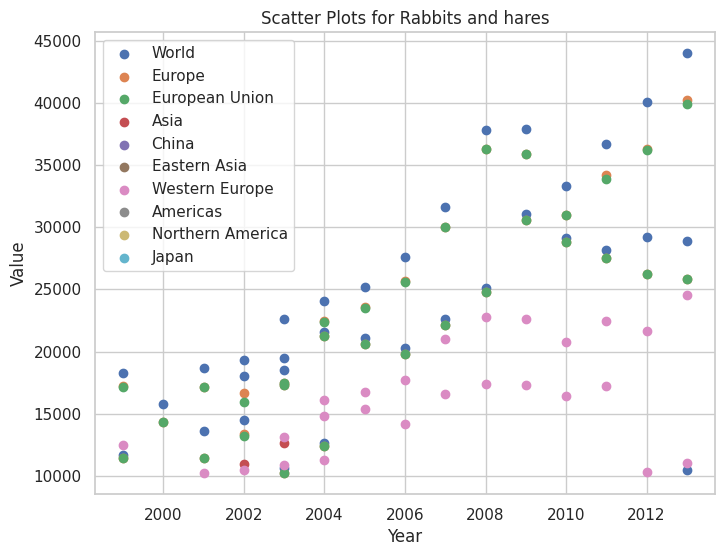

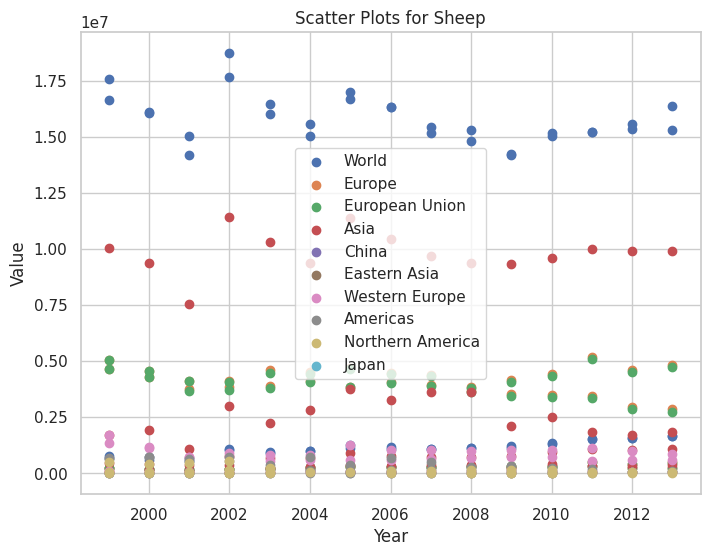

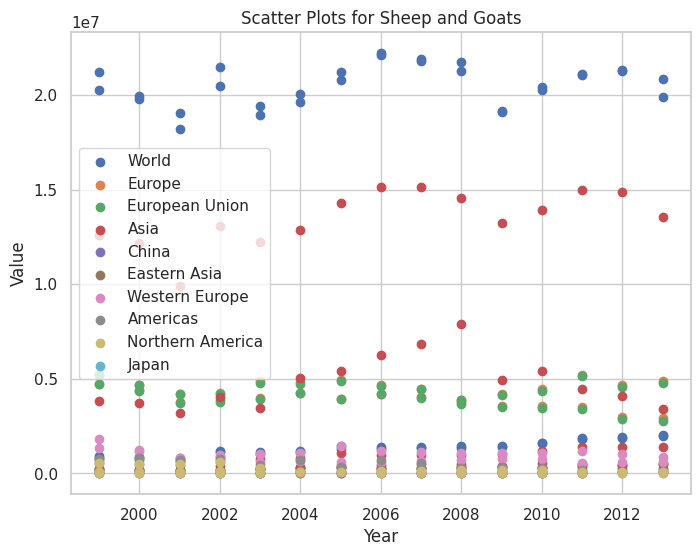

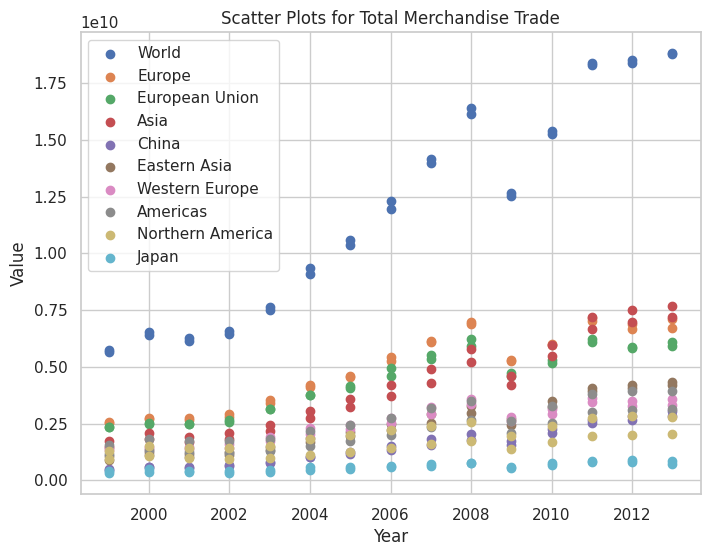

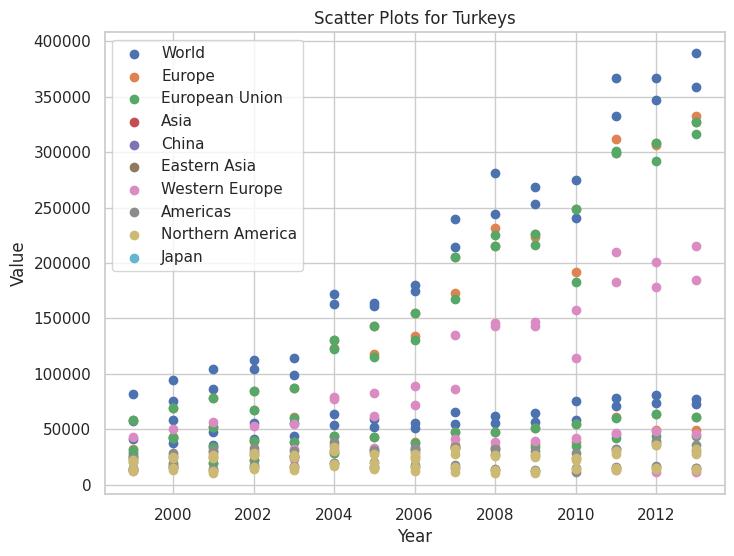

In [154]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df4 is your DataFrame

# Get the unique values in the 'Item' column and sort them
unique_items = sorted(df4['Item'].unique())

# Sort the DataFrame by the 'Item' column
sorted_df2 = df4.sort_values(by='Item')

# Filter the DataFrame for the last ten years
last_ten_years = sorted_df2[sorted_df2['Year'] >= sorted_df2['Year'].max() - 14]

# Get the top 10 countries based on the mean 'Value' over the last ten years
top_countries = last_ten_years.groupby('Country')['Value'].mean().sort_values(ascending=False).head(10).index

# Create scatter plots for the top 10 countries for each unique item
for item in unique_items:
    plt.figure(figsize=(8, 6))
    plt.title(f'Scatter Plots for {item}')
    plt.xlabel('Year')
    plt.ylabel('Value')

    for country in top_countries:
        subset = last_ten_years[(last_ten_years['Item'] == item) & (last_ten_years['Country'] == country)]
        plt.scatter(subset['Year'], subset['Value'], label=country)

    plt.legend()
    plt.show()


In [155]:
# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df4['Element'].unique())

# Sort the DataFrame by the 'Element' column
sorted_df2 = df4.sort_values(by='Element')

# Filter the DataFrame for 'Import Quantity' and 'Europe'
europe_import_df = sorted_df2[(sorted_df2['Element'] == 'Import Quantity') & (sorted_df2['Country'] == 'Europe')]

# Filter the DataFrame for the years between 1999 and 2013
europe_import_years_df = europe_import_df[(europe_import_df['Year'] >= 1999) & (europe_import_df['Year'] <= 2013)]

# Iterate through each unique element
for element in unique_elements:
    print(f"Element: {element}")

    # Filter the DataFrame for the current element
    element_df = sorted_df2[sorted_df2['Element'] == element]

    # Check if there are significant changes in cattle import quantities in Europe
    significant_changes_df = europe_import_years_df[abs(europe_import_years_df['Value'].diff()) >= 100000]
    if not significant_changes_df.empty:
        print("Significant Changes Found in Europe:")
        print(significant_changes_df)

Element: Export Quantity
Significant Changes Found in Europe:
       Country     Item          Element       Value  Year
603516  Europe  Turkeys  Import Quantity     38330.0  2010
603305  Europe    Sheep  Import Quantity   3460267.0  2011
603293  Europe    Sheep  Import Quantity   4664033.0  1999
601570  Europe   Cattle  Import Quantity   3469294.0  2000
603513  Europe  Turkeys  Import Quantity     35572.0  2007
...        ...      ...              ...         ...   ...
602844  Europe     Pigs  Import Quantity   9873614.0  2002
602845  Europe     Pigs  Import Quantity  10112307.0  2003
602418  Europe   Horses  Import Quantity    209015.0  2000
602843  Europe     Pigs  Import Quantity   8360652.0  2001
602419  Europe   Horses  Import Quantity    255502.0  2001

[79 rows x 5 columns]
Element: Export Value
Significant Changes Found in Europe:
       Country     Item          Element       Value  Year
603516  Europe  Turkeys  Import Quantity     38330.0  2010
603305  Europe    Sheep  Impor

In [156]:
import pandas as pd

# Assuming df4 is your DataFrame

# Get the unique values in the 'Item' column and sort them
unique_items = sorted(df4['Item'].unique())

# Sort the DataFrame by the 'Item' column
sorted_df2 = df4.sort_values(by='Item')

# Filter the DataFrame for 'Import Quantity' and 'Europe'
europe_import_df = sorted_df2[(sorted_df2['Element'] == 'Import Quantity') & (sorted_df2['Country'] == 'Europe')]

# Filter the DataFrame for the years between 1999 and 2013
europe_import_years_df = europe_import_df[(europe_import_df['Year'] >= 1999) & (europe_import_df['Year'] <= 2013)]

# Iterate through each unique item
for item in unique_items:
    print(f"Item: {item}")

    # Filter the DataFrame for the current item
    item_df = sorted_df2[sorted_df2['Item'] == item]

    # Check if there are significant changes in cattle import quantities in Europe
    significant_changes_df = europe_import_years_df[abs(europe_import_years_df['Value'].diff()) >= 100000]
    if not significant_changes_df.empty:
        print("Significant Changes Found in Europe:")
        print(significant_changes_df)


Item: Agricult.Products,Total
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]
Item: Animals live nes
Significant Changes Found in Europe:
       Country             Item          Element      Valu

Item: Agricult.Products,Total
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


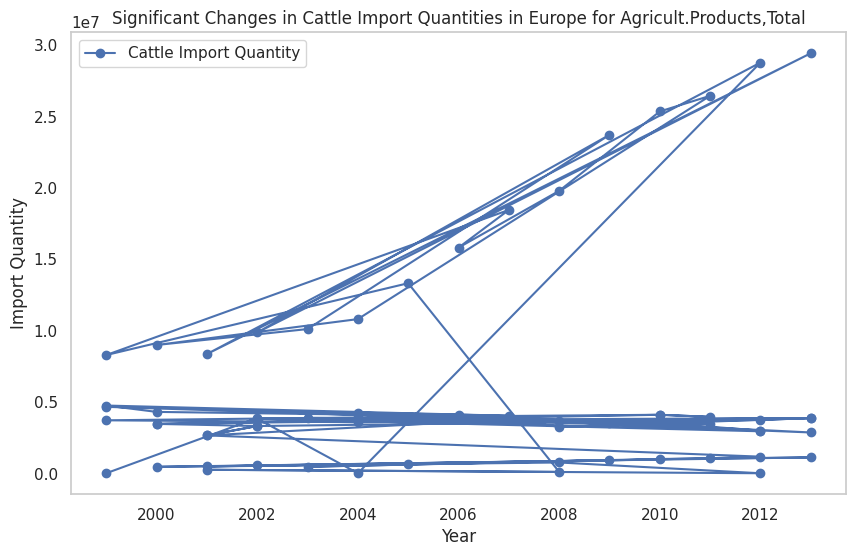

Item: Animals live nes
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


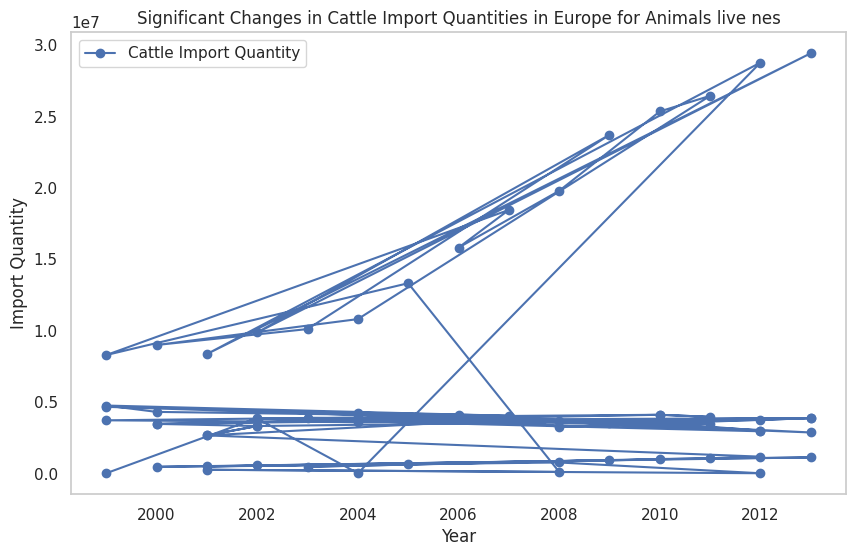

Item: Animals, live, non-food
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


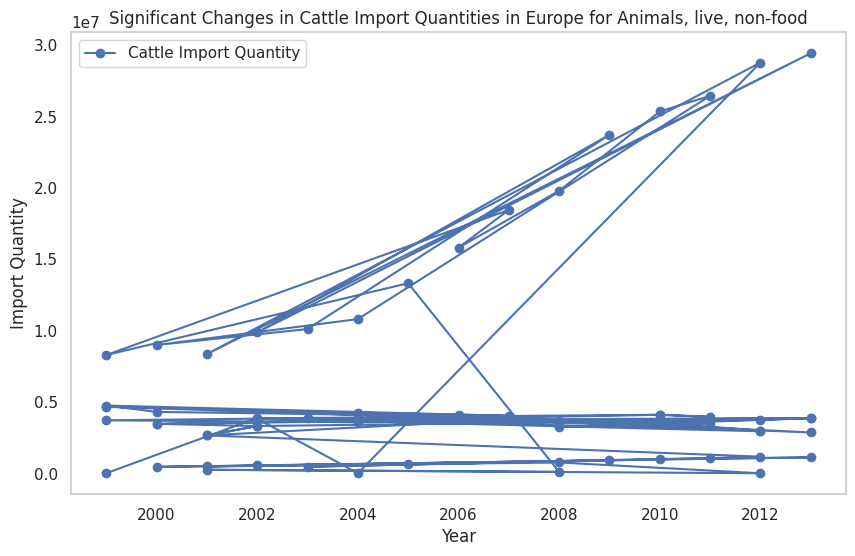

Item: Asses
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


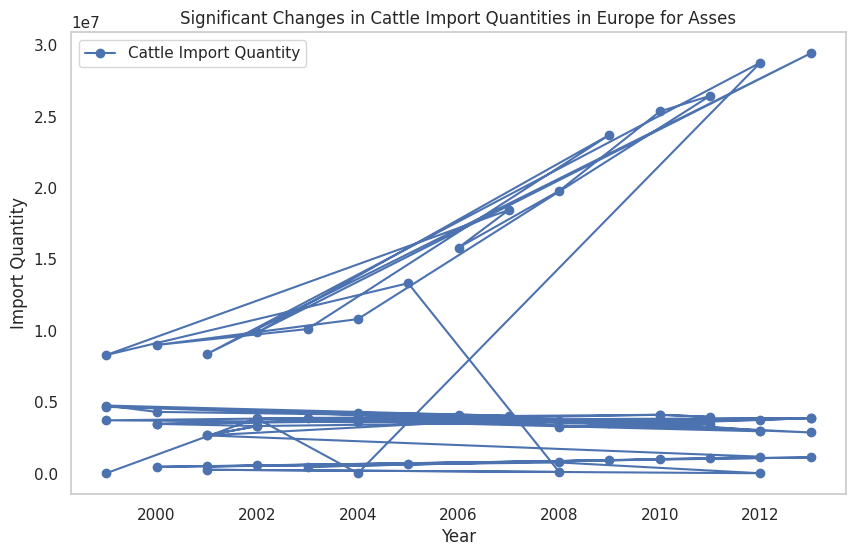

Item: Beehives
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


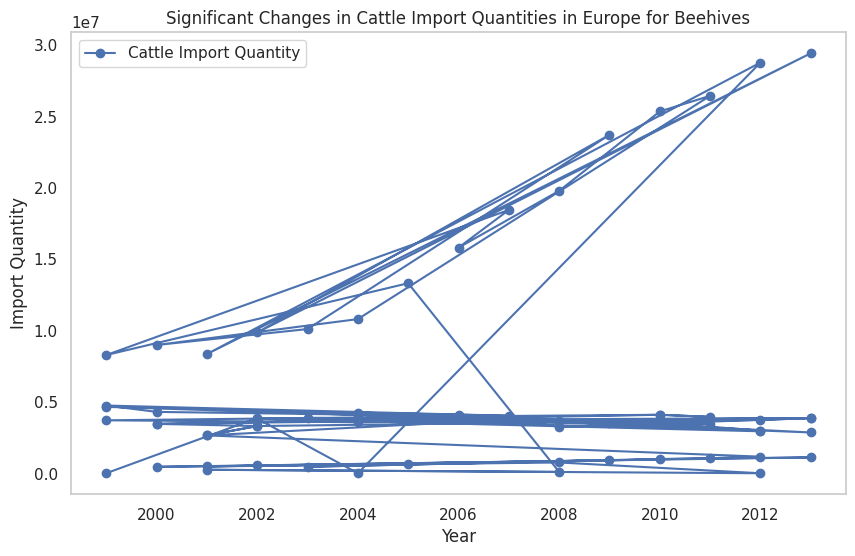

Item: Bovine, Animals
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


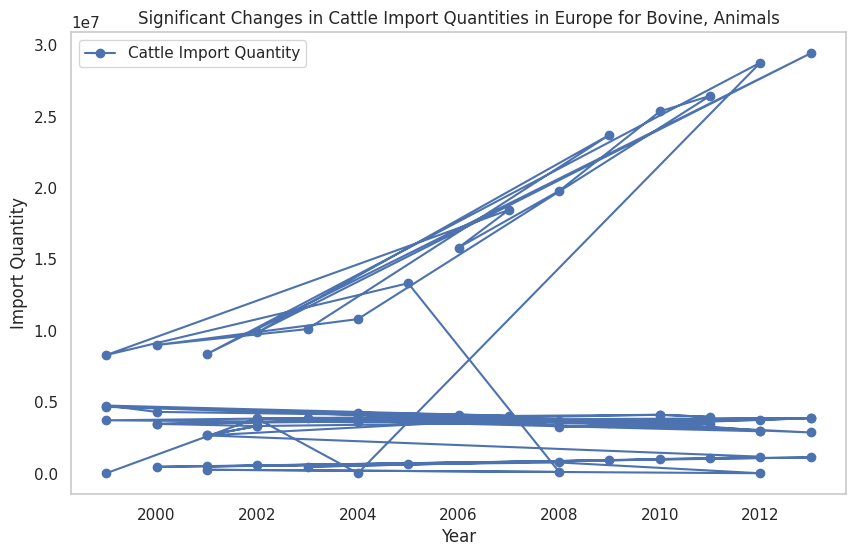

Item: Buffaloes
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


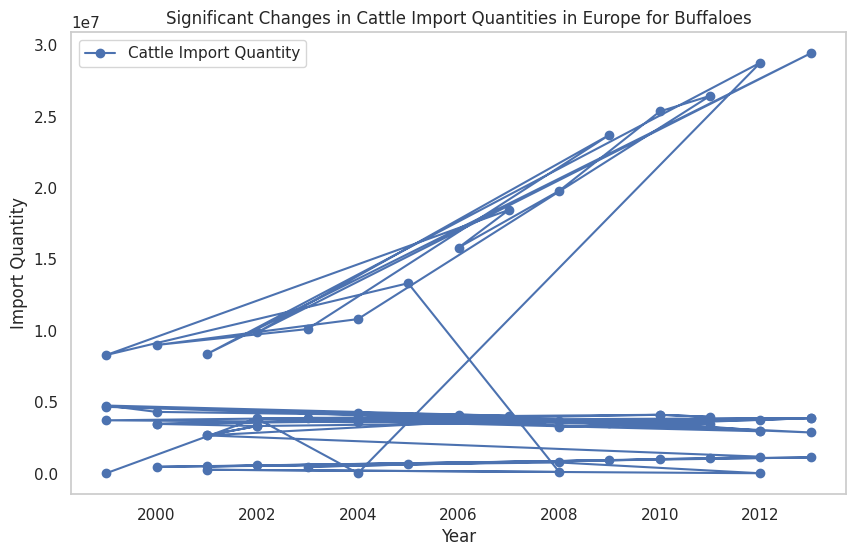

Item: Camels
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


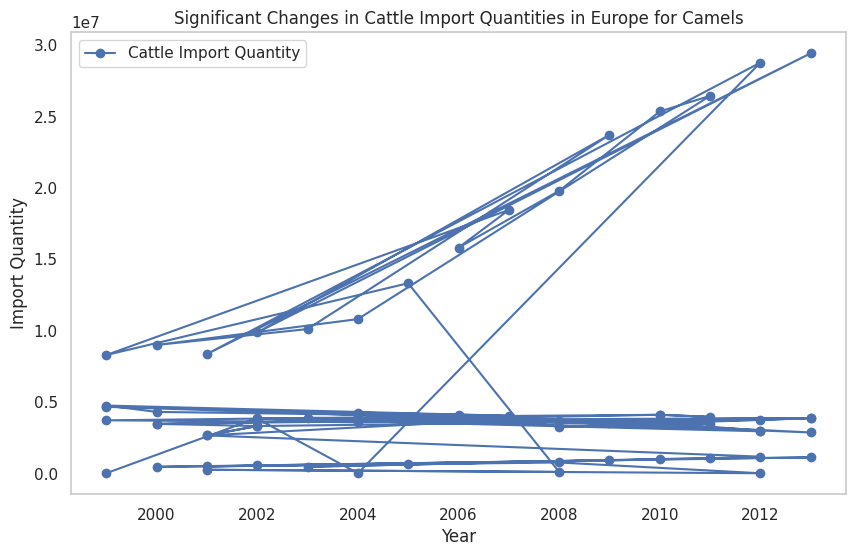

Item: Cattle
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


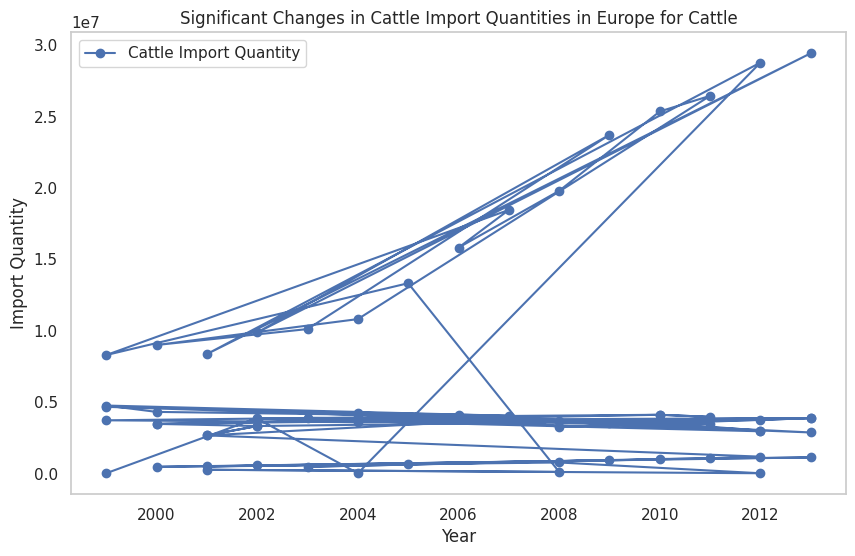

Item: Chickens
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


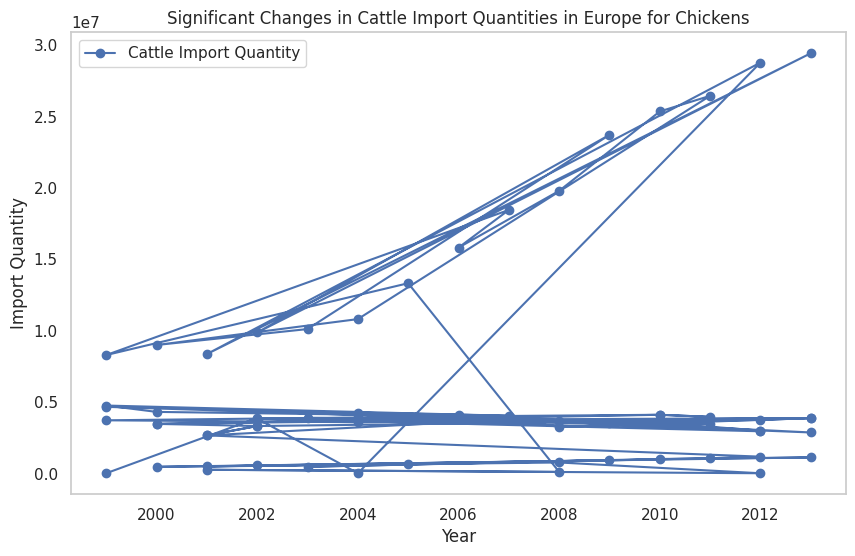

Item: Ducks
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


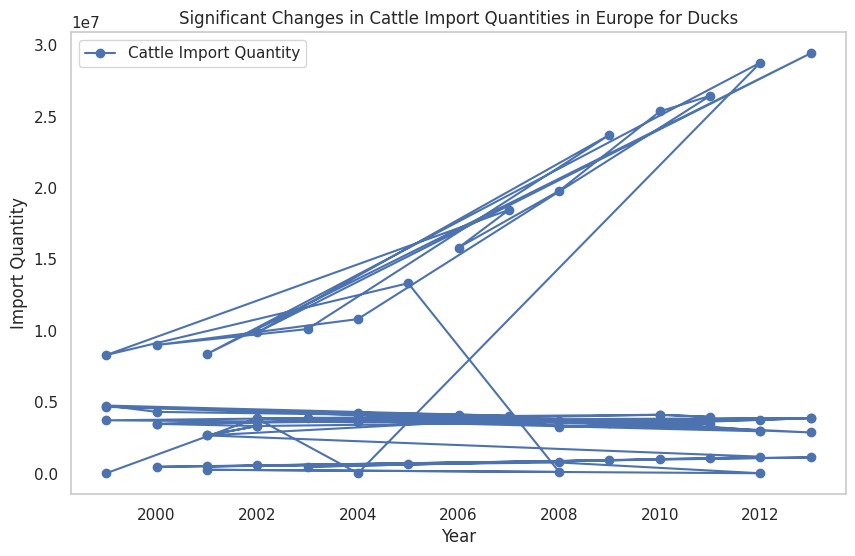

Item: Food Excl Fish
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


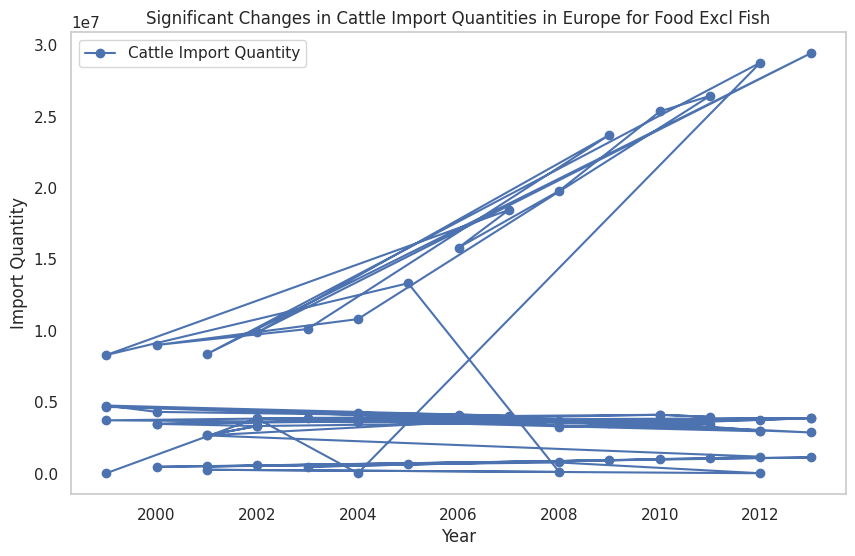

Item: Goats
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


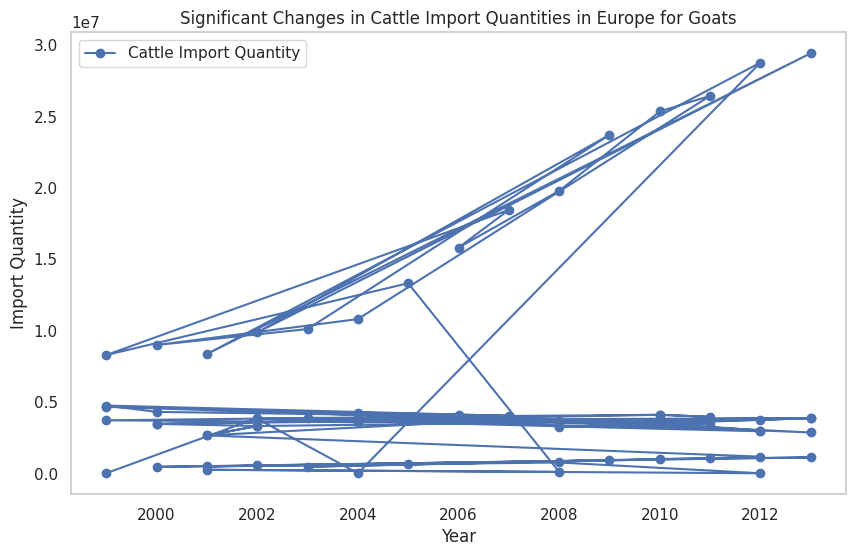

Item: Horses
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


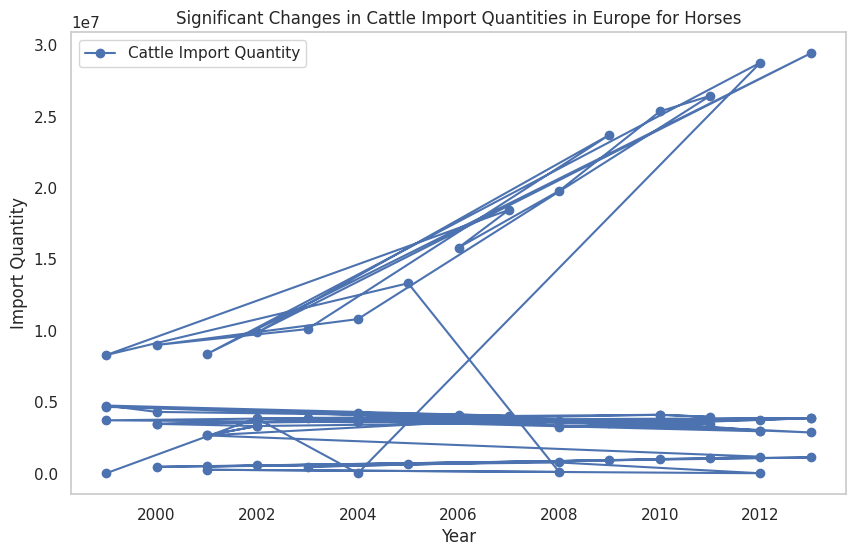

Item: Live Animals
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


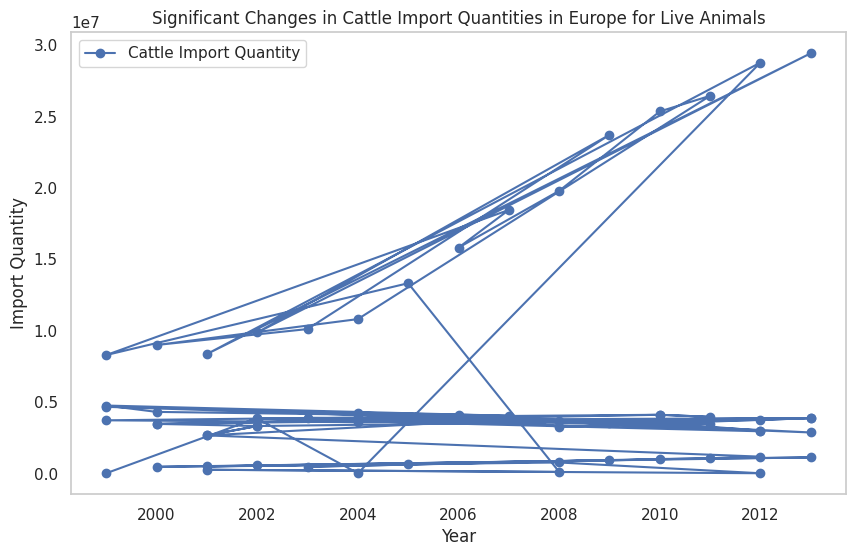

Item: Mules
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


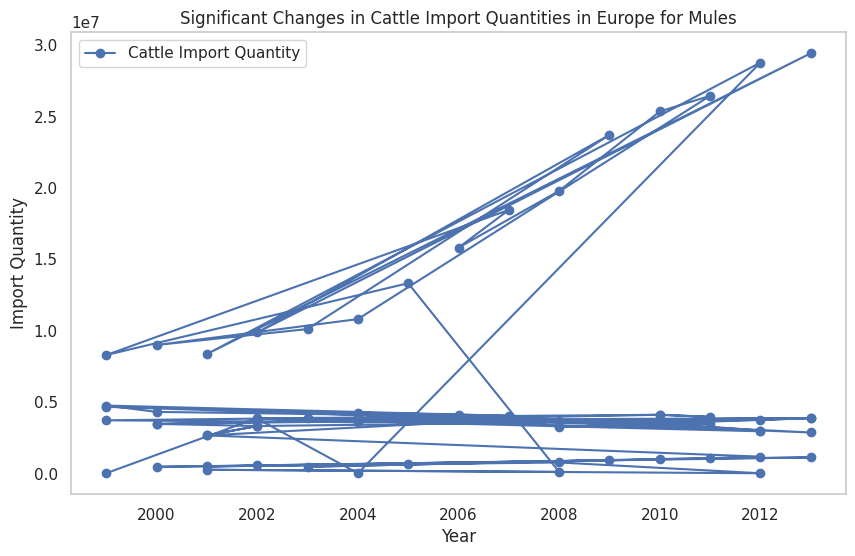

Item: Pigeons, other birds
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


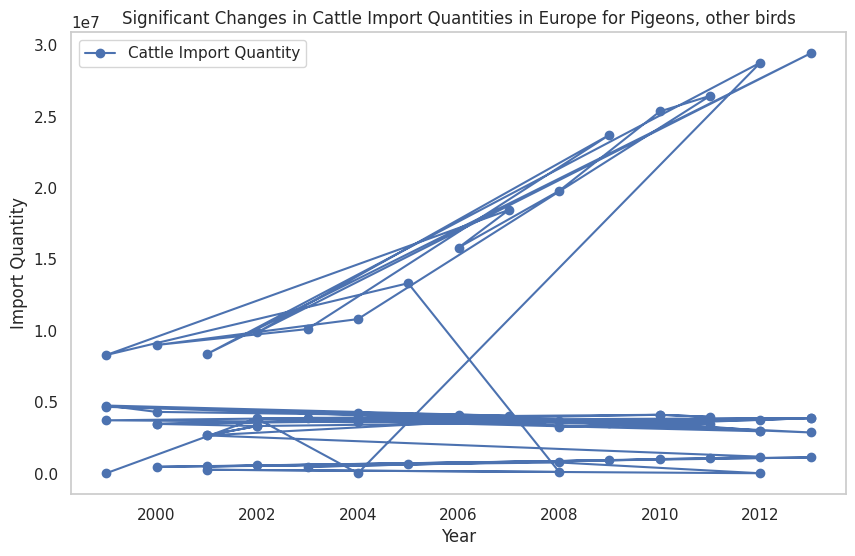

Item: Pigs
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


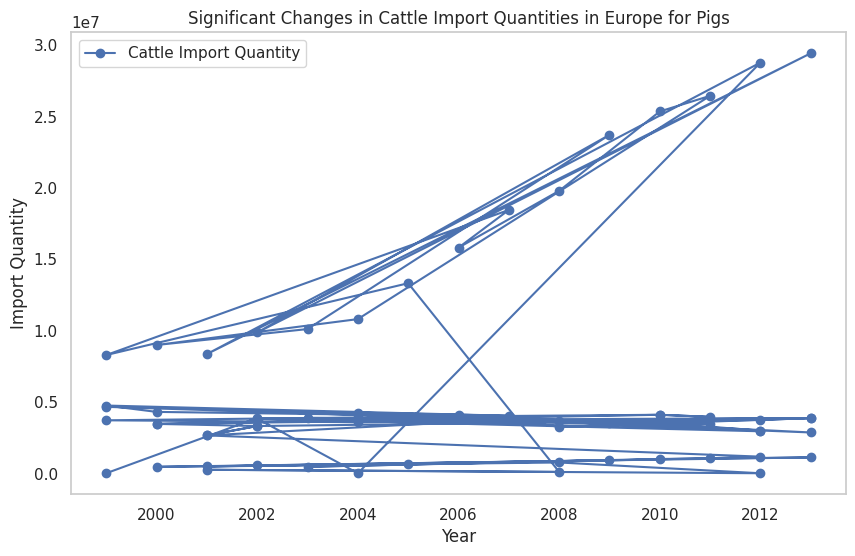

Item: Rabbits and hares
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


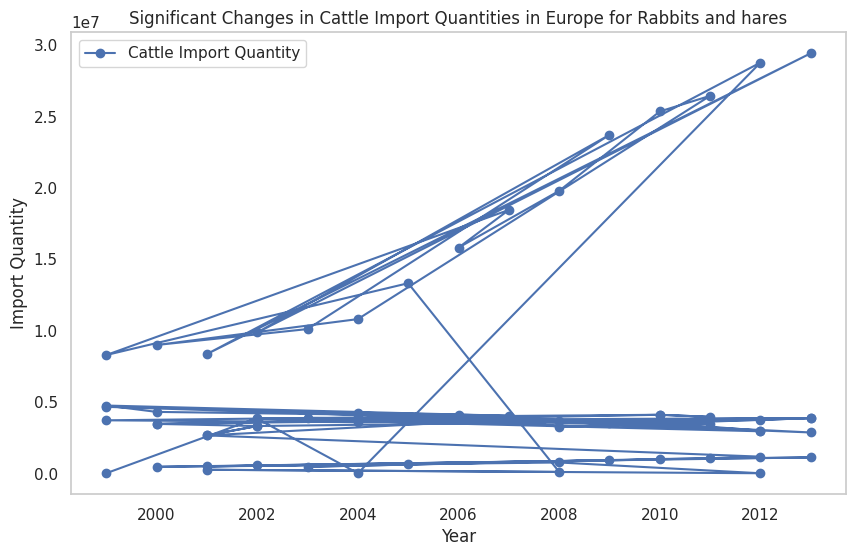

Item: Sheep
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


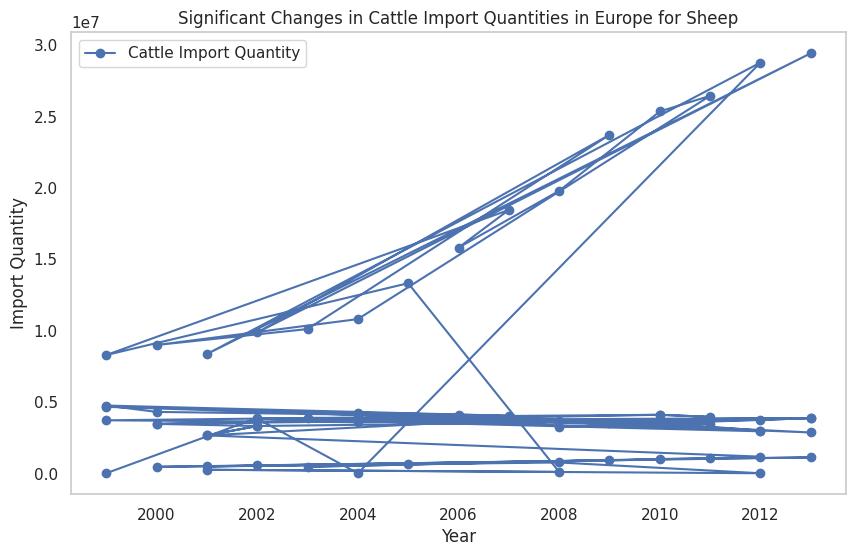

Item: Sheep and Goats
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


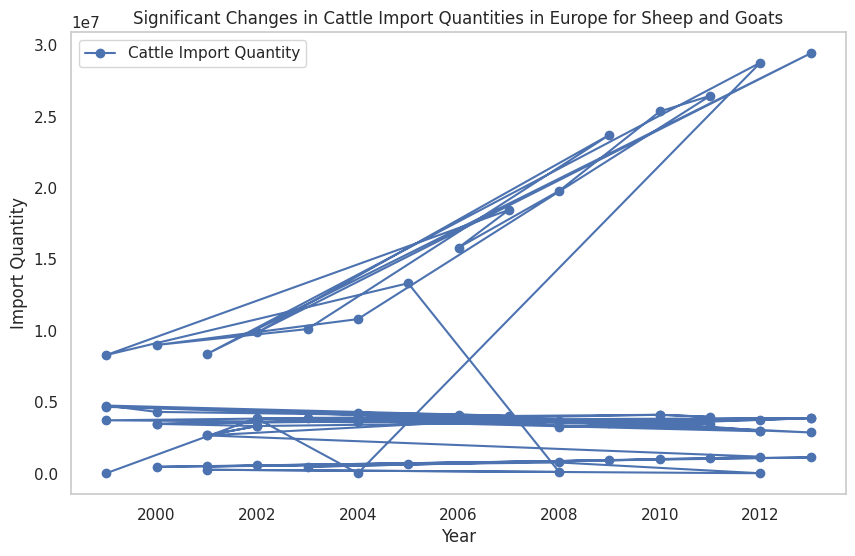

Item: Total Merchandise Trade
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


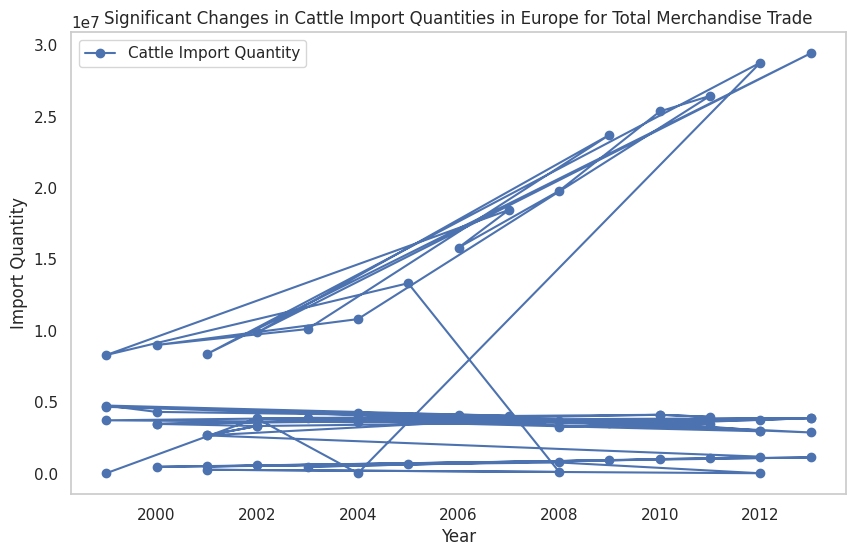

Item: Turkeys
Significant Changes Found in Europe:
       Country             Item          Element      Value  Year
603930  Europe  Bovine, Animals  Import Quantity  3469294.0  2000
603932  Europe  Bovine, Animals  Import Quantity  3319935.0  2002
603931  Europe  Bovine, Animals  Import Quantity  2662631.0  2001
603937  Europe  Bovine, Animals  Import Quantity  3782651.0  2007
603943  Europe  Bovine, Animals  Import Quantity  3879826.0  2013
...        ...              ...              ...        ...   ...
604358  Europe  Sheep and Goats  Import Quantity  4257751.0  2004
604366  Europe  Sheep and Goats  Import Quantity  2997993.0  2012
604364  Europe  Sheep and Goats  Import Quantity  3540661.0  2010
604356  Europe  Sheep and Goats  Import Quantity  3881658.0  2002
603505  Europe          Turkeys  Import Quantity    12874.0  1999

[66 rows x 5 columns]


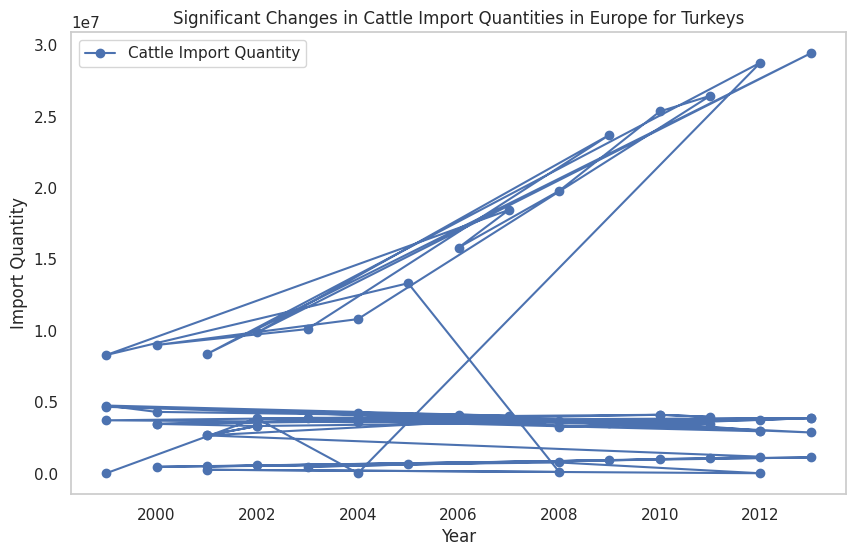

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df4 is your DataFrame

# Get the unique values in the 'Item' column and sort them
unique_items = sorted(df4['Item'].unique())

# Sort the DataFrame by the 'Item' column
sorted_df2 = df4.sort_values(by='Item')

# Filter the DataFrame for 'Import Quantity' and 'Europe'
europe_import_df = sorted_df2[(sorted_df2['Element'] == 'Import Quantity') & (sorted_df2['Country'] == 'Europe')]

# Filter the DataFrame for the years between 1999 and 2013
europe_import_years_df = europe_import_df[(europe_import_df['Year'] >= 1999) & (europe_import_df['Year'] <= 2013)]

# Iterate through each unique item
for item in unique_items:
    print(f"Item: {item}")

    # Filter the DataFrame for the current item
    item_df = sorted_df2[sorted_df2['Item'] == item]

    # Check if there are significant changes in cattle import quantities in Europe
    significant_changes_df = europe_import_years_df[abs(europe_import_years_df['Value'].diff()) >= 100000]
    if not significant_changes_df.empty:
        print("Significant Changes Found in Europe:")
        print(significant_changes_df)

        # Create a line graph showing the significant changes
        plt.figure(figsize=(10, 6))
        plt.plot(significant_changes_df['Year'], significant_changes_df['Value'], marker='o', label='Cattle Import Quantity')
        plt.title(f'Significant Changes in Cattle Import Quantities in Europe for {item}')
        plt.xlabel('Year')
        plt.ylabel('Import Quantity')
        plt.legend()
        plt.grid()
        plt.show()


In [168]:
import pandas as pd
import numpy as np

# Assuming df4 is your DataFrame

# Select a specific 'Item' (e.g., 'Cattle') from the list of unique items
item_of_interest = 'Cattle'

# Filter the data for the selected 'Item'
filtered_df = df4[df4['Item'] == item_of_interest]

# Filter data for the last 15 years (assuming the dataset includes a 'Year' column)
last_15_years_df = filtered_df[filtered_df['Year'] >= (filtered_df['Year'].max() - 15)]

# Group the data by country and calculate the total import and export quantities for each country
country_totals = last_15_years_df.groupby('Item')[['Import Quantity', 'Export Quantity']].sum()

# Sort the countries by total export quantity in descending order and select the top 10
top_10_exporting_countries = country_totals.sort_values(by='Export Quantity', ascending=False).head(10)

# Calculate the overall statistics for import and export quantities
import_quantity_stats = top_10_exporting_countries['Import Quantity'].describe()
export_quantity_stats = top_10_exporting_countries['Export Quantity'].describe()

# Print the overall statistics and the top 10 exporting countries
print("Descriptive Statistics for Import Quantity:")
print(import_quantity_stats)

print("\nDescriptive Statistics for Export Quantity:")
print(export_quantity_stats)

print("\nTop 10 Exporting Countries in the Last 15 Years:")
print(top_10_exporting_countries)


KeyError: ignored

In [169]:
#Descriptive statistics
#Question1
import pandas as pd
import numpy as np

# Assuming df4 is your DataFrame

# Select a specific 'Item' (e.g., 'Cattle') from the list of unique items
item_of_interest = 'Cattle'

# Filter the data for the selected 'Item'
filtered_df = df4[df4['Item'] == item_of_interest]

# Filter data for the last 15 years (assuming the dataset includes a 'Year' column)
last_15_years_df = filtered_df[filtered_df['Year'] >= (filtered_df['Year'].max() - 15)]

# Group the data by country and calculate the total import and export quantities for each country
country_totals = last_15_years_df.groupby('Country')[['Value']].sum()

# Sort the countries by total export quantity in descending order and select the top 10
top_10_exporting_countries = country_totals.sort_values(by='Value', ascending=False).head(10)

# Calculate the overall statistics for import and export quantities
import_quantity_stats = top_10_exporting_countries['Value'].describe()

# Print the overall statistics and the top 10 exporting countries
print("Descriptive Statistics for Import/Export Value:")
print(import_quantity_stats)

print("\nTop 10 Exporting Countries in the Last 15 Years:")
print(top_10_exporting_countries)


Descriptive Statistics for Import/Export Value:
count    1.000000e+01
mean     1.493733e+08
std      1.320492e+08
min      4.901782e+07
25%      6.438808e+07
50%      9.951237e+07
75%      1.942991e+08
max      4.824931e+08
Name: Value, dtype: float64

Top 10 Exporting Countries in the Last 15 Years:
                                               Value
Country                                             
World                                    482493128.0
Europe                                   215865392.0
European Union                           208383656.0
Americas                                 152045296.0
Western Europe                           103941970.0
Northern America                          95082765.0
Southern Europe                           73355611.0
United States of America                  61398901.0
France                                    52148387.0
Net Food Importing Developing Countries   49017817.0


In [170]:
#Descriptive statistics
#Question2
import pandas as pd
import numpy as np

# Load your dataset (replace 'your_dataset.csv' with the actual path to your dataset file)
# df = pd.read_csv('your_dataset.csv')

# Filter the dataset for the specific agricultural commodity you're interested in (e.g., 'Wheat')
commodity = 'Cattle'
filtered_df = df4[df4['Item'] == commodity]

# Filter data for the last 15 years (assuming the dataset includes a 'Year' column)
last_15_years_df = filtered_df[filtered_df['Year'] >= (filtered_df['Year'].max() - 15)]

# Group the data by country and year, and calculate the total import and export quantities for each country-year
country_year_totals = last_15_years_df.groupby(['Country', 'Year'])[['Value']].sum().reset_index()

# Calculate the change in export quantity for each country-year compared to the previous year
country_year_totals['Value Change'] = country_year_totals.groupby('Country')['Value'].diff()

# Identify countries and years with significant changes in export quantity
significant_changes = country_year_totals[abs(country_year_totals['Value Change']) >= 100000]  # You can adjust the threshold as needed

# Print the list of countries and years with significant changes in export quantity
print("Countries and Years with Significant Changes in Export Quantity:")
print(significant_changes[['Country', 'Year', 'Value Change']])


Countries and Years with Significant Changes in Export Quantity:
     Country  Year  Value Change
3     Africa  1999     -131604.0
4     Africa  2000     -127374.0
6     Africa  2002     -278451.0
7     Africa  2003     -298830.0
8     Africa  2004      522896.0
...      ...   ...           ...
1818   World  2012      814972.0
1819   World  2013     1200252.0
1827   Yemen  2007      107307.0
1828   Yemen  2008     -152157.0
1833   Yemen  2013      196747.0

[556 rows x 3 columns]
